In [72]:
import io
import os
import re
import sys
import csv
import gzip
import glob
import time
import secrets
import multiprocessing
import subprocess
import resource
import numpy as np
import pandas as pd
# import sqlite3
import matplotlib.pyplot as plt
# from plotnine import *
# import patchworklib as pw
# import scipy as sp
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import random
import collections
from collections import Counter
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import FuncFormatter
import itertools
from itertools import combinations
sys.path.append('/well/band/users/rbx225/software/lcwgsus/')
sys.path.append('/well/band/users/rbx225/software/QUILT_test/QUILT/Python/')
import lcwgsus
from lcwgsus.variables import *
from hla_phase_functions import *
from hla_align_functions import *

from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import friedmanchisquare
from scipy.stats import studentized_range
from scipy.stats import power_divergence, chi2_contingency
from scipy.stats import pearsonr
pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

%cd /gpfs3/well/band/users/rbx225/GAMCC/

# from matplotlib import colormaps
# list(colormaps)

/gpfs3/well/band/users/rbx225/GAMCC


# Analysis

In [82]:
x = pyreadr.read_r('results/hla/imputation/QUILT_HLA_result_method/IDT0481/A/extracted.hlaA.RData')['quilt']
x

,A*01:01,A*01:02,A*02:01,A*02:02,A*02:03,A*02:04,A*02:05,A*02:06,A*02:07,A*02:08,...,A*68:01,A*68:02,A*68:03,A*68:15,A*68:17,A*69:01,A*74:01,A*74:02,A*74:03,A*80:01
A*01:01,2.819712e-24,9.817056e-26,7.431432e-23,2.499027e-23,4.268946e-25,1.064543e-24,3.571679e-25,4.199646e-24,7.452671e-24,7.255317e-27,...,2.727462e-24,5.134114e-25,5.568312e-27,1.465026e-26,3.664162e-27,2.697417e-26,8.232356e-23,5.588740e-24,2.032269e-24,2.914905e-25
A*01:02,0.000000e+00,2.316670e-27,2.142096e-24,1.348097e-24,8.864228e-27,5.663921e-26,7.350104e-27,1.138553e-25,2.043294e-25,1.515969e-28,...,8.814032e-26,8.621019e-27,8.412793e-29,2.205395e-28,5.515832e-29,5.735231e-28,4.474312e-24,3.037804e-25,1.104656e-25,4.458799e-27
A*02:01,0.000000e+00,0.000000e+00,7.285680e-22,8.519321e-22,7.961200e-24,3.592842e-23,6.665823e-24,3.057262e-23,4.921799e-23,1.357069e-25,...,6.787801e-23,9.551188e-24,1.030610e-25,2.684721e-25,6.713732e-26,5.141732e-25,2.831142e-21,1.922035e-22,6.989217e-23,3.065766e-24
A*02:02,0.000000e+00,0.000000e+00,0.000000e+00,1.388422e-23,6.305320e-24,9.288087e-25,5.307343e-24,5.124472e-23,9.002559e-23,1.067788e-25,...,2.692904e-23,8.527298e-24,9.705223e-26,2.555264e-25,6.390871e-26,3.926706e-25,3.140819e-23,2.119140e-24,7.705963e-25,5.060148e-24
A*02:03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.210881e-26,2.642752e-25,2.650659e-26,4.085209e-25,7.330741e-25,5.507720e-28,...,3.733823e-25,2.765534e-26,2.475773e-28,6.525378e-28,1.632037e-28,2.105320e-27,2.099539e-23,1.425471e-24,5.183530e-25,1.315371e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A*69:01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.374901e-28,1.305777e-24,8.865458e-26,3.223803e-26,9.107931e-28
A*74:01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.501613e-23,3.690884e-24,1.342140e-24,1.697835e-23
A*74:02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.475755e-25,9.002744e-26,1.152809e-24
A*74:03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.273725e-26,4.192034e-25


## tmp

In [39]:
def extract_2field(allele_name):
    return ":".join(allele_name.split(":")[:2])

def compute_closest_2field(df_msa):
    alleles = df_msa.columns.tolist()
    msa_array = df_msa.T.to_numpy()  # shape: (n_alleles, n_positions)
    n = len(alleles)

    # Distance matrix (Hamming distances)
    dist_matrix = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.sum(msa_array[i] != msa_array[j])
            dist_matrix[i, j] = dist_matrix[j, i] = dist

    # For each allele, find the closest *other* allele
    result = []
    for i in range(n):
        distances = dist_matrix[i]
        distances[i] = 1000000
        min_idx = np.argmin(distances)
        result.append({
            "allele": alleles[i],
            "closest_allele": alleles[min_idx],
            "distance": int(distances[min_idx])
        })

    return pd.DataFrame(result)

In [78]:
def shannon_entropy(column):
    counts = Counter(column)
    total = sum(counts.values())
    return -sum((count/total) * math.log2(count/total) for count in counts.values() if count > 0)

def msa_entropy(msa_df):
    return msa_df.apply(shannon_entropy, axis=1).mean()

def num_segregating_sites(msa_df):
    return sum(msa_df.nunique(axis=1) > 1)/msa_df.shape[0]

avg_entropy = []
n_seg = []

for i,g in enumerate(HLA_GENES):
    db = pd.read_csv(f'../recyclable_files/hla_reference_files/v3570_aligners/{g}.ssv', sep = ' ')
    avg_entropy.append(msa_entropy(db))
    n_seg.append(num_segregating_sites(db))
    
df = pd.DataFrame({'Locus': HLA_GENES, 'Entropy': avg_entropy, '%_diff_sites': n_seg})
df

,Locus,Entropy,%_diff_sites
0,A,0.194867,0.963321
1,B,0.296866,0.803213
2,C,0.284769,0.754991
3,DQB1,0.243234,0.472172
4,DRB1,0.386126,0.588022


$P(G|data) = \dfrac{P(data_i | G) * P(data_o | G) * P(G)}{P(data)}$

$P(data | G) = P(data_i | G) * P(data_o | G)$

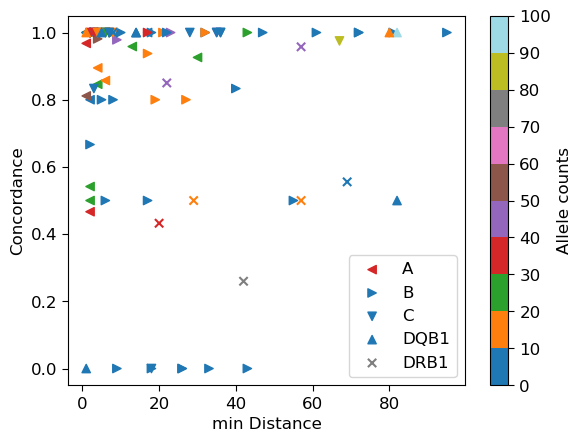

In [76]:
hla_dir = hla_dirs[7]
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
lc = lcwgsus.read_hla_lc_imputation_results(hla_dir, mode = 'test')
ccd_dict_lc = lcwgsus.compare_hla_types_by_type(hla, lc)
ccd_dict_lc = lcwgsus.calculate_hla_concordance_by_type(ccd_dict_lc, verbose = False)

markers = ['<', '>', 'v', '^', 'x']

bounds = 10*np.arange(11)
norm = mcolors.BoundaryNorm(bounds, CATEGORY_CMAP.N)

for i,g in enumerate(HLA_GENES):
    db = pd.read_csv(f'../recyclable_files/hla_reference_files/v3570_merged_only/{g}.ssv', sep = ' ')
    two_field_map = [extract_2field(col) for col in db.columns]

    seen = set()
    selected_columns = []
    for col, tf in zip(db.columns, two_field_map):
        if tf not in seen:
            selected_columns.append(col)
            seen.add(tf)

    db = db[selected_columns]
    db.columns = sorted(seen)
    db = compute_closest_2field(db)

    alleles = ccd_dict_lc[g].sort_values(by = 'Accuracy').reset_index(names = 'allele')
    alleles['allele'] = g + '*' + alleles['allele'] 
    alleles = pd.merge(db, alleles, on = 'allele', how = 'inner').sort_values(by = 'Accuracy')
    alleles = alleles[alleles['distance'] <= 100]

    plt.scatter(alleles['distance'], alleles['Accuracy'], c = alleles['Sum'], marker = markers[i], 
                cmap=CATEGORY_CMAP, norm=norm, label = g)

plt.legend()
plt.xlabel('min Distance')
plt.ylabel('Concordance')
plt.colorbar(boundaries=bounds,
            ticks=bounds,
            label='Allele counts')

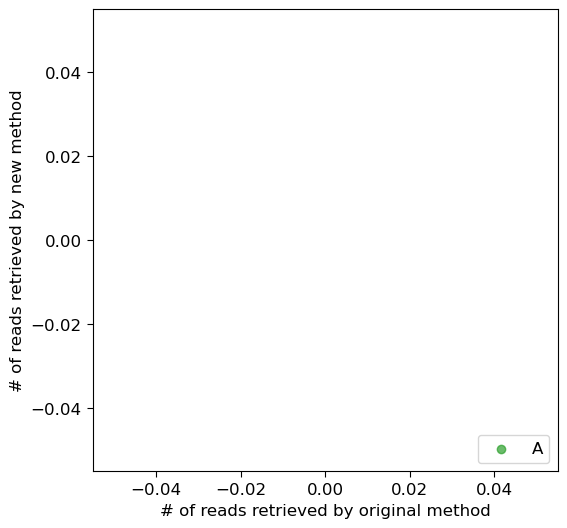

In [51]:
hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
hlatypes = hlatypes[['Sample ID', f'HLA-{g} 1', f'HLA-{g} 2']]
hlatypes = hlatypes[hlatypes['Sample ID'].str.startswith('IDT')]

targets = alleles[alleles['Accuracy'] < 0.7]['allele'].str.split('*').str.get(1).tolist()

hlatypes = hlatypes[(hlatypes[f'HLA-{g} 1'].isin(targets)) & (hlatypes[f'HLA-{g} 2'].isin(targets))]

ofile = f'results/hla/imputation/metrics/QUILT_HLA_result_merged_ref/n_reads.tsv'
n_reads = pd.read_csv(ofile, sep = '\t')
n_reads = n_reads[(n_reads['Locus'] == g) & (n_reads['Sample'].isin(hlatypes['Sample ID']))]

plt.figure(figsize = (6,6))
ax = plt.gca()
tmp = n_reads[n_reads['Locus'] == g]

correct = tmp[tmp['Two field match'] == 2]
jitter = np.random.normal(loc=0, scale=0.5, size=len(correct))
ax.scatter(correct['qn_true'] + jitter, correct['n_true'], marker='o', c=CATEGORY_CMAP_HEX[i], alpha=0.7, label=g)

incorrect = tmp[tmp['Two field match'] < 2]
jitter = np.random.normal(loc=0, scale=0.05, size=len(incorrect))
ax.scatter(incorrect['qn_true'] + jitter, incorrect['n_true'], marker='x', c=CATEGORY_CMAP_HEX[i], alpha=0.7)

n_max = max(correct['n_true'].max(), correct['qn_true'].max(), incorrect['n_true'].max(), incorrect['qn_true'].max())
ax.plot([0, n_max], [0, n_max], color='black')

ax.set_xlabel('# of reads retrieved by original method')
ax.set_ylabel('# of reads retrieved by new method')
ax.legend(loc = 'lower right')

In [53]:
combined = lcwgsus.read_hla_lc_imputation_results(hla_dirs[5], combined = 'combined', mode = 'old')
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
prob = combined['prob'].values
combined = lcwgsus.compare_hla_types(hla, combined)
combined['prob'] = prob
combined['SampleID'] = combined['SampleID'].apply(lambda x: sl[x])
combined = combined[(combined['Locus'] == g) & (combined['SampleID'].isin(hlatypes['Sample ID']))]
combined

,SampleID,Locus,One field1,Two field1,One field2,Two field2,One field match,Two field match,Two field total,prob


In [69]:
read = lcwgsus.read_hla_lc_imputation_results(hla_dirs[5], combined = 'onlyreads', mode = 'old')
prob = read['prob'].values
read = lcwgsus.compare_hla_types(hla, read)
read['prob'] = prob
read['SampleID'] = read['SampleID'].apply(lambda x: sl[x])
read = read[(read['Locus'] == g) & (read['SampleID'].isin(hlatypes['Sample ID']))]
read

,SampleID,Locus,One field1,Two field1,One field2,Two field2,One field match,Two field match,Two field total,prob
55,IDT0561,A,33,33:01,33,33:03,1,1,2,0.561358
125,IDT0560,A,01,01:01,33,33:03,0,0,2,0.328172
190,IDT0712,A,01,01:01,33,33:01,1,1,2,0.416328
210,IDT0768,A,01,01:01,33,33:01,1,1,2,0.690416
310,IDT0731,A,68,68:02,68,68:02,2,1,2,0.052831
420,IDT0576,A,33,33:01,33,33:03,0,0,2,0.320689
435,IDT0518,A,33,33:03,68,68:02,1,1,2,0.375519
485,IDT0727,A,01,01:01,33,33:01,1,1,2,0.350836
550,IDT0535,A,33,33:01,33,33:01,2,2,2,0.303133
565,IDT0692,A,01,01:01,01,01:01,1,0,2,0.473725


In [60]:
g = 'A'
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
sl = pd.read_csv(SAMPLE_LINKER_FILE)
sl = sl[~sl['Sample_Name'].str.contains('mini')]
sl = {k:v for k, v in zip(sl['Chip_Name'], sl['Seq_Name'])}

hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
hlatypes = hlatypes[['Sample ID', f'HLA-{g} 1', f'HLA-{g} 2']]
hlatypes = hlatypes[hlatypes['Sample ID'].str.startswith('IDT')]

state = lcwgsus.read_hla_lc_imputation_results(hla_dirs[5], combined = 'onlystates', mode = 'old')
prob = state['prob'].values
state = lcwgsus.compare_hla_types(hla, state)
state['prob'] = prob
state['SampleID'] = state['SampleID'].apply(lambda x: sl[x])
state = state[(state['Locus'] == g) & (state['SampleID'].isin(hlatypes['Sample ID']))]
state

,SampleID,Locus,One field1,Two field1,One field2,Two field2,One field match,Two field match,Two field total,prob
0,IDT0713,A,02,02:01,02,02:01,2,2,2,0.962430
5,IDT0630,A,01,01:02,01,01:02,2,2,2,0.825271
10,IDT0756,A,29,29:02,34,34:02,2,2,2,0.999987
15,IDT0701,A,66,66:01,74,74:01,2,2,2,0.999999
20,IDT0582,A,02,02:01,68,68:02,2,2,2,0.950663
...,...,...,...,...,...,...,...,...,...,...
1025,IDT0762,A,03,03:01,33,33:01,1,1,2,0.330892
1030,IDT0555,A,23,23:01,23,23:01,2,2,2,0.999966
1035,IDT0488,A,03,03:01,26,26:01,2,2,2,0.999960
1040,IDT0628,A,23,23:01,33,33:03,2,2,2,0.794755


## QUILT and method retrieved reads

In [10]:
def filter_raw_as_matrix(mate, reads1, columns, gene, n_mismatches = 5, assumed_bq = 0.001, rl = 151, score_diff_in_alignment_genes = 0):
    mate = mate.copy()
    reads1 = reads1.copy()
    
    columns_to_keep = np.where(np.char.startswith(columns, gene + '*'))[0]
    target_alleles = columns[columns_to_keep]
    min_valid_prob = n_mismatches*np.log(assumed_bq) + (rl - n_mismatches)*np.log(1 - assumed_bq)

    valid_indices1 = np.any(mate >= min_valid_prob, axis=1)
    mate, reads1 = mate[valid_indices1], reads1[valid_indices1]
    id1 = reads1.iloc[:, 0].to_numpy()

    unique_ids = np.unique(id1)
    likemat_mate = -600*np.ones((len(unique_ids), mate.shape[1]))

    for i, uid in enumerate(unique_ids):
        tmp = mate[id1 == uid, :]

        keep = False
        unique = True
        for j in range(tmp.shape[0]):
            best_indices = np.where(tmp[j,:] == tmp[j,:].max())[0]
            best_alleles = columns[best_indices]
            aligned_genes = np.unique(np.array([s.split('*')[0] for s in best_alleles]))
            keep = keep or ((len(aligned_genes) == 1) and (aligned_genes[0] == gene))
            unique = unique and (gene in aligned_genes)

        if (keep and unique):
            likemat_mate[i, :] = np.sum(tmp, axis=0)
            
    scoring_df = pd.DataFrame({'ID': unique_ids, 
                        'Target': likemat_mate[:,columns_to_keep].max(axis = 1), 
                        'Others': likemat_mate[:,~np.where(np.char.startswith(columns, gene + '*'))[0]].max(axis = 1)
                       })
    scoring_df['diff'] = scoring_df['Target'] - scoring_df['Others']
    valid_mask = ((scoring_df['diff'] > score_diff_in_alignment_genes) & (scoring_df['Target'] >= min_valid_prob)).tolist()
            
    likemat_mate = likemat_mate[valid_mask,:][:, columns_to_keep]
    unique_ids = unique_ids[valid_mask]
    reads1 = reads1[reads1['ID'].isin(unique_ids)]
    likemat_mate_df = pd.DataFrame(likemat_mate, index = unique_ids, columns=target_alleles)
    return likemat_mate_df, reads1

def get_n_aligned_mates_method(g, s, as_dir, columns):
    bam = f'data/bams/{s}.bam'
    hla_gene_information = pd.read_csv(HLA_GENE_INFORMATION_FILE, sep = ' ')
    reads1 = get_chr6_reads(g, bam, hla_gene_information, reads_apart_max = 1000)
    mate = pd.read_csv(f"{as_dir}{s}/{g}/AS_matrix.ssv", sep = ' ', index_col = 0).values
    mate, reads1 = filter_raw_as_matrix(mate, reads1, columns, g)
    return mate

def get_n_aligned_mates_quilt(g, s, indir, columns):
    ifile = f'{indir}{s}/{g}/extracted.hla{g}.RData'
    data = pyreadr.read_r(ifile)
    if len(data) != 0:
        qmate = data['qmate']
        qmate = qmate.loc[(qmate.index != ''), :]

        columns_to_keep = np.where(np.char.startswith(columns, g + '*'))[0]
        target_alleles = columns[columns_to_keep]
        qmate.columns = target_alleles
    else:
        return pd.DataFrame()
    return qmate

def count_correct_aligned_reads(mate, a1, a2):
    if len(mate) == 0:
        return 0
    else:
        row_max = mate.max(axis=1)
        result = mate.eq(row_max, axis=0)
        indices = [lcwgsus.extract_unique_twofield(list(row[row].index)) for _, row in result.iterrows()]
        n_true = np.array([(a1 in i) or (a2 in i) for i in indices]).sum()
        return n_true

def get_columns_from_indir(db_dir, genes):
    columns = []
    for g in genes:
        db = pd.read_csv(f'{db_dir}{g}.ssv', sep = ' ')
        columns = columns + db.columns.tolist()
    return np.array(columns)

In [43]:
columns_oneKG_only = get_columns_from_indir('/well/band/users/rbx225/recyclable_files/hla_reference_files/v3390_merged_only/', 
                                            HLA_GENES_ALL)
columns_all = get_columns_from_indir('/well/band/users/rbx225/recyclable_files/hla_reference_files/v3390_aligners/', 
                                     HLA_GENES_ALL)

samples = lcwgsus.read_tsv_as_lst(FV_IDT_NAMES_FILE)

old_as_dir = 'results/hla/imputation/QUILT_HLA_result_merged_ref/'
as_dir = 'results/hla/imputation/WFA_alignments/v3390_oneKG_archived/'

sl = pd.read_csv('data/rename_tsvs/fv_gam_to_idt.ssv', header = None, sep = ' ')
sl.columns = ['gam', 'idt']
sl = {k:v for k,v in zip(sl['gam'], sl['idt'])}

hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
hlatypes = hlatypes[hlatypes['Sample ID'].isin(samples)].iloc[:,2:].reset_index(drop = True)

n_reads = pd.DataFrame(columns = ['Locus', 'Sample', 'qn', 'n', 'qn_true', 'n_true'])

for g in HLA_GENES:
    for s in samples:
        mate = get_n_aligned_mates_method(g, s, as_dir, columns_oneKG_only)
        qmate = get_n_aligned_mates_quilt(g, s, old_as_dir, columns_all)
        
        tmp = hlatypes[hlatypes['Sample ID'] == s].reset_index(drop = True)
        a1, a2 = tmp.loc[0, [f'HLA-{g} 1', f'HLA-{g} 2']]
        a1 = f'{g}*{a1}'
        a2 = f'{g}*{a2}'
        
        n = mate.shape[0]
        qn = qmate.shape[0]
        qn_true = count_correct_aligned_reads(qmate, a1, a2)
        n_true = count_correct_aligned_reads(mate, a1, a2)
        
        n_reads.loc[len(n_reads)] = [g, s, qn, n, qn_true, n_true]
        
n_reads['% qn_true'] = np.where(n_reads['qn'] == 0, 0, n_reads['qn_true']/n_reads['qn'])
n_reads['% n_true'] = np.where(n_reads['n'] == 0, 0, n_reads['n_true']/n_reads['n'])

raw5 = lcwgsus.read_hla_lc_imputation_results(hla_dirs[5], combined = 'combined', recode_two_field = False, mode = 'test')
compared5 = lcwgsus.compare_hla_types(hla, raw5)[['Locus', 'SampleID', 'Two field match']]
compared5.columns = ['Locus', 'Sample', 'Two field match']
compared5['Sample'] = compared5['Sample'].apply(lambda x: sl[x])
n_reads = pd.merge(n_reads, compared5, on = ['Locus', 'Sample'])

ofile = f'results/hla/imputation/metrics/QUILT_HLA_result_merged_ref/n_reads.tsv'
n_reads.to_csv(ofile, sep = '\t', index = False)
n_reads = pd.read_csv(ofile, sep = '\t')

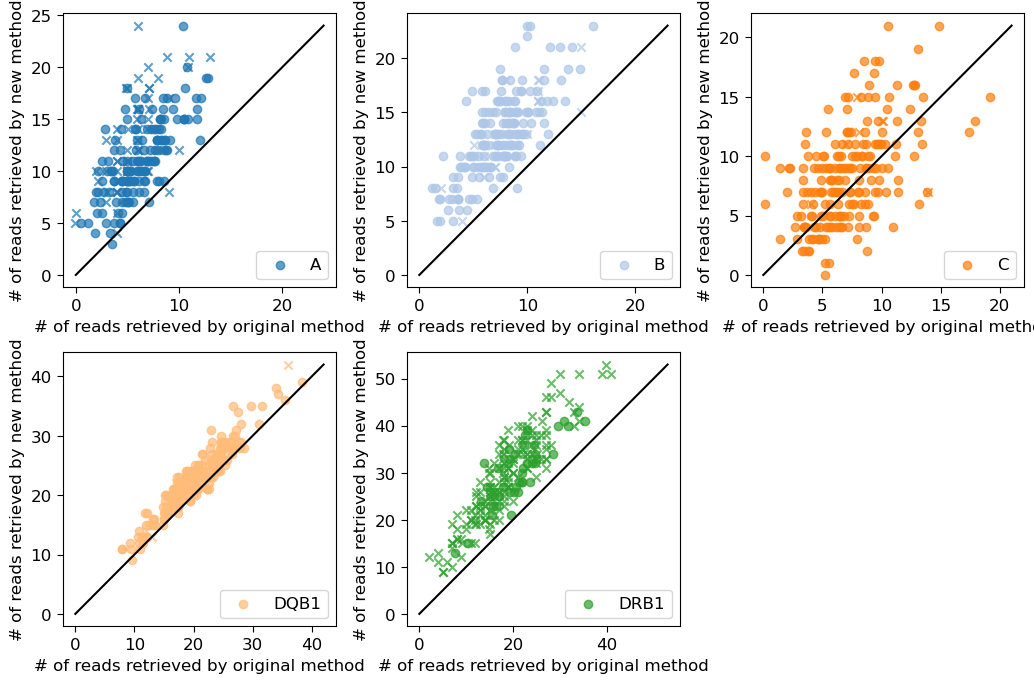

In [32]:
ofile = f'results/hla/imputation/metrics/QUILT_HLA_result_merged_ref/n_reads.tsv'
n_reads = pd.read_csv(ofile, sep = '\t')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10.5, 7))
axes = axes.flatten()

for i, g in enumerate(HLA_GENES):
    ax = axes[i]
    tmp = n_reads[n_reads['Locus'] == g]
    
    correct = tmp[tmp['Two field match'] == 2]
    jitter = np.random.normal(loc=0, scale=0.5, size=len(correct))
    ax.scatter(correct['qn'] + jitter, correct['n'], marker='o', c=CATEGORY_CMAP_HEX[i], alpha=0.7, label=g)

    incorrect = tmp[tmp['Two field match'] < 2]
    jitter = np.random.normal(loc=0, scale=0.05, size=len(incorrect))
    ax.scatter(incorrect['qn'] + jitter, incorrect['n'], marker='x', c=CATEGORY_CMAP_HEX[i], alpha=0.7)

    n_max = max(correct['n'].max(), correct['qn'].max(), incorrect['n'].max(), incorrect['qn'].max())
    ax.plot([0, n_max], [0, n_max], color='black')

    ax.set_xlabel('# of reads retrieved by original method')
    ax.set_ylabel('# of reads retrieved by new method')
    ax.legend(loc = 'lower right')


fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

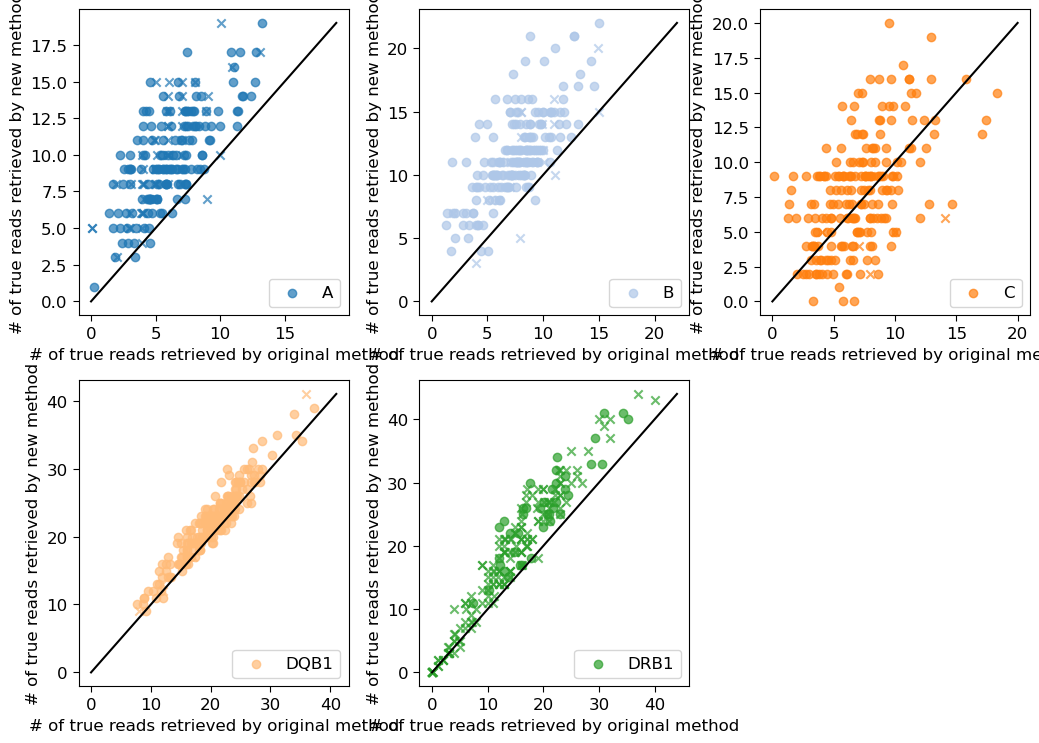

In [35]:
ofile = f'results/hla/imputation/metrics/QUILT_HLA_result_merged_ref/n_reads.tsv'
n_reads = pd.read_csv(ofile, sep = '\t')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10.4, 7.6))
axes = axes.flatten()

for i, g in enumerate(HLA_GENES):
    ax = axes[i]
    tmp = n_reads[n_reads['Locus'] == g]
    
    correct = tmp[tmp['Two field match'] == 2]
    jitter = np.random.normal(loc=0, scale=0.5, size=len(correct))
    ax.scatter(correct['qn_true'] + jitter, correct['n_true'], marker='o', c=CATEGORY_CMAP_HEX[i], alpha=0.7, label=g)

    incorrect = tmp[tmp['Two field match'] < 2]
    jitter = np.random.normal(loc=0, scale=0.05, size=len(incorrect))
    ax.scatter(incorrect['qn_true'] + jitter, incorrect['n_true'], marker='x', c=CATEGORY_CMAP_HEX[i], alpha=0.7)

    n_max = max(correct['n_true'].max(), correct['qn_true'].max(), incorrect['n_true'].max(), incorrect['qn_true'].max())
    ax.plot([0, n_max], [0, n_max], color='black')

    ax.set_xlabel('# of true reads retrieved by original method')
    ax.set_ylabel('# of true reads retrieved by new method')
    ax.legend(loc = 'lower right')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [50]:
# for i, g in enumerate(HLA_GENES):
#     tmp = n_reads[n_reads['Locus'] == g]
#     correct = tmp[tmp['Two field match'] == 2]
#     plt.scatter(correct['% qn_true'], correct['% n_true'], marker = 'o', c = CATEGORY_CMAP_HEX[i], alpha = 0.7, label = g)
#     incorrect = tmp[tmp['Two field match'] < 2]
#     plt.scatter(incorrect['% qn_true'], incorrect['% n_true'], marker = 'x', c = CATEGORY_CMAP_HEX[i], alpha = 0.7)
# plt.legend()
# plt.xlabel('% true reads retrieved by original method')
# plt.ylabel('% true reads retrieved by new method')

## QUILT LD confidence vs all confidence

In [25]:
method_dir = 'results/hla/imputation/QUILT_HLA_result_method_archived/'
original_dir = 'results/hla/imputation/QUILT_HLA_result_v3390/'

def get_hla_state_combined_comparison(indir):
    combined = lcwgsus.read_hla_lc_imputation_results(indir, combined = 'combined', recode_two_field = False)
    state = lcwgsus.read_hla_lc_imputation_results(indir, combined = 'onlystates', recode_two_field = False)
    combined = combined.rename(columns = {'prob': 'p_combined'})
    state = state.rename(columns = {'prob': 'p_state'})
    combined = pd.merge(combined, state[['SampleID', 'Locus', 'p_state']], on = ['SampleID', 'Locus'])
    tmp = combined[['SampleID', 'Locus', 'p_state', 'p_combined']]
    hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
    compared = lcwgsus.compare_hla_types(hla, combined)
    combined_result = pd.merge(compared, tmp, on = ['SampleID', 'Locus']).drop(columns = ['One field1', 'One field2', 'One field match'])

    combined = lcwgsus.read_hla_lc_imputation_results(indir, combined = 'combined', recode_two_field = False)
    state = lcwgsus.read_hla_lc_imputation_results(indir, combined = 'onlystates', recode_two_field = False)
    combined = combined.rename(columns = {'prob': 'p_combined'})
    state = state.rename(columns = {'prob': 'p_state'})
    state = pd.merge(state, combined[['SampleID', 'Locus', 'p_combined']], on = ['SampleID', 'Locus'])
    tmp = state[['SampleID', 'Locus', 'p_state', 'p_combined']]
    hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
    compared = lcwgsus.compare_hla_types(hla, state)

    results = pd.merge(combined_result, compared[['SampleID', 'Locus', 'Two field match']], on = ['SampleID', 'Locus'], suffixes = ('_combined', '_state'))
    return results

method_df = get_hla_state_combined_comparison(method_dir)
original_df = get_hla_state_combined_comparison(original_dir)

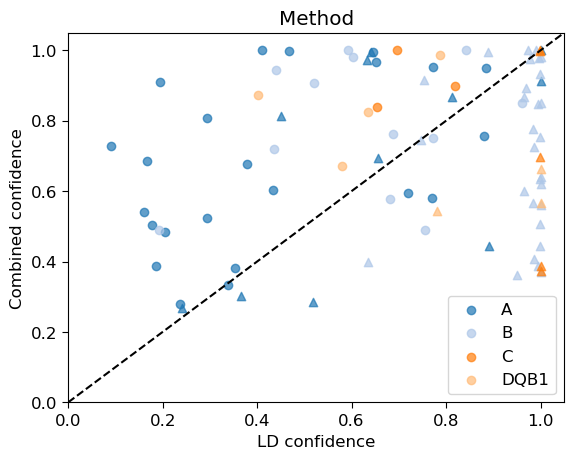

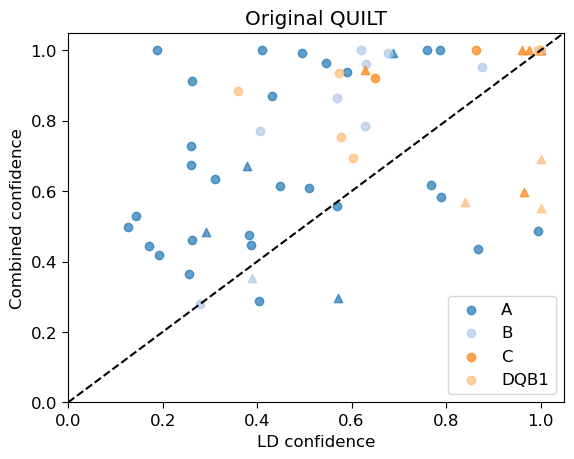

In [26]:
def get_p_same_allele(r, df, w_df = None):
    s = r['SampleID']
    g = r['Locus']
    
    if w_df is not None:
        w_df = w_df[(w_df['SampleID'] == s) & (w_df['Locus'] == g)].reset_index(drop = True)
        a1 = w_df.loc[0, 'Two field1']
        a2 = w_df.loc[0, 'Two field2']
    else:
        a1 = r['Two field1']
        a2 = r['Two field2']
    
    df = df.copy()
    tmp = df[(df['SampleID'] == s) & (df['Locus'] == g) & 
                  (((df['Two field1'] == a1) & (df['Two field2'] == a2)) | 
                   ((df['Two field1'] == a2) & (df['Two field2'] == a1)))].reset_index(drop = True)
    
    if len(tmp) != 0:
        r['p_original_same_allele'] = tmp.loc[0, 'prob']
    return r
def plot_confidence_vs_confidence(compared):
    for i, g in enumerate(HLA_GENES):
        tmp = compared[compared['Locus'] == g]
        correct = tmp[tmp['Two field match'] == tmp['Two field total']]
        plt.scatter(correct['p_state'], correct['p_combined'], marker = 'o', c = CATEGORY_CMAP_HEX[i], label = g)
        incorrect = tmp[tmp['Two field match'] < tmp['Two field total']]
        plt.scatter(incorrect['p_state'], incorrect['p_combined'], marker = 'x', c = CATEGORY_CMAP_HEX[i])
    plt.legend()
    plt.xlabel('LD confidence')
    plt.ylabel('Combined confidence')
def plot_confidence_vs_confidence2(compared, genes = HLA_GENES, cutoff_state = None, title = '', plot_equal = False):
    x0 = 0
    x1 = 1.05
    if cutoff_state is not None:
        compared = compared.copy()
        compared = compared[compared['p_state'] >= cutoff_state]
        x0 = cutoff_state - 0.05
    for i, g in enumerate(genes):
        tmp = compared[compared['Locus'] == g]
        combined = tmp[tmp['Two field match_combined'] > tmp['Two field match_state']]
        plt.scatter(combined['p_state'], combined['p_combined'], marker = 'o', alpha = 0.7, c = CATEGORY_CMAP_HEX[i], label = g)
        state = tmp[tmp['Two field match_combined'] < tmp['Two field match_state']]
        plt.scatter(state['p_state'], state['p_combined'], marker = '^', alpha = 0.7, c = CATEGORY_CMAP_HEX[i])
        if plot_equal:
            equal = tmp[tmp['Two field match_combined'] == tmp['Two field match_state']]
            plt.scatter(equal['p_state'], equal['p_combined'], marker = 'x', alpha = 0.7, c = CATEGORY_CMAP_HEX[i])
    plt.legend()
    plt.plot([x0, x1], [x0, x1], color = 'black', ls = '--')
    plt.xlabel('LD confidence')
    plt.ylabel('Combined confidence')
    plt.xlim((x0, x1))
    plt.ylim((x0, x1))
    plt.title(title)
    plt.show()
    return None
    
plot_confidence_vs_confidence2(method_df, genes = ['A', 'B', 'C', 'DQB1'], title = 'Method')
plot_confidence_vs_confidence2(original_df, genes = ['A', 'B', 'C', 'DQB1'], title = 'Original QUILT')

Text(0, 0.5, 'New confidence')

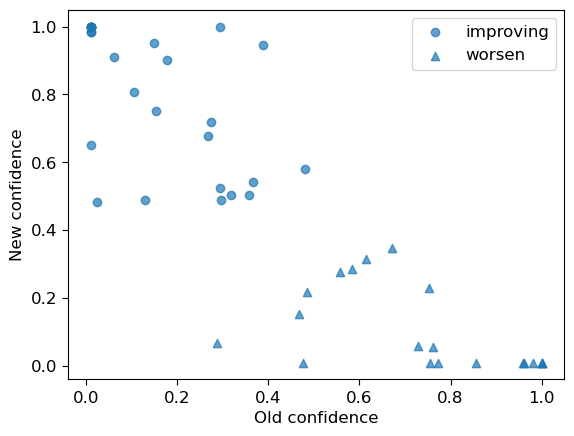

In [229]:
raw5 = lcwgsus.read_hla_lc_imputation_results(method_dir, combined = 'combined', recode_two_field = False, mode = 'test')
raw0 = lcwgsus.read_hla_lc_imputation_results(original_dir, combined = 'combined', recode_two_field = False)
compared0 = lcwgsus.compare_hla_types(hla, raw0)
compared5 = lcwgsus.compare_hla_types(hla, raw5)

compared0['p_original'] = raw0['prob']
compared0['p_method'] = raw5['prob']
compared5['p_original'] = raw0['prob']
compared5['p_method'] = raw5['prob']

matched = compared5[compared5['Two field match'] == 2].index
matched = matched.intersection(raw0.index)

wrong_compared0 = compared0[compared0['Two field match'] < 2]
wrong_compared0 = wrong_compared0.loc[wrong_compared0.index.intersection(matched)]

matched = compared0[compared0['Two field match'] == 2].index
matched = matched.intersection(raw5.index)

wrong_compared5 = compared5[compared5['Two field match'] < 2]
wrong_compared5 = wrong_compared5.loc[wrong_compared5.index.intersection(matched)]

raw0_all = read_hla_lc_imputation_results_all(original_dir)
raw5_all = read_hla_lc_imputation_results_all(method_dir, mode = 'test')

wrong_compared5['p_original_same_allele'] = 0.01
wrong_compared5 = wrong_compared5.apply(get_p_same_allele, args = (raw5_all,), axis = 1)

wrong_compared0['p_original_same_allele'] = 0.01
wrong_compared0 = wrong_compared0.apply(get_p_same_allele, args = (raw0_all,), axis = 1)

w0 = wrong_compared0[wrong_compared0['Locus'] != 'DRB1']
w5 = wrong_compared5[wrong_compared5['Locus'] != 'DRB1']

plt.scatter(w0['p_original_same_allele'], w0['p_method'], marker = 'o', c = CATEGORY_CMAP_HEX[0], alpha = 0.7, label = 'improving')
plt.scatter(w5['p_original'], w5['p_original_same_allele'], marker = '^', c = CATEGORY_CMAP_HEX[0], alpha = 0.7, label = 'worsen')

# plt.scatter(w0['p_original'], w0['p_method'], marker = 'o', c = CATEGORY_CMAP_HEX[0], alpha = 0.7, label = 'improving')
# plt.scatter(w5['p_original'], w5['p_method'], marker = '^', c = CATEGORY_CMAP_HEX[0], alpha = 0.7, label = 'worsen')

plt.legend()
plt.xlabel('Old confidence')
plt.ylabel('New confidence')

# w0 = wrong_compared0[wrong_compared0['Locus'] == 'DRB1']
# w5 = wrong_compared5[wrong_compared5['Locus'] == 'DRB1']

# plt.scatter(w0['p_original'], w0['p_method'], marker = 'o', c = CATEGORY_CMAP_HEX[2], alpha = 0.7, label = 'improving')
# plt.scatter(w5['p_original'], w5['p_method'], marker = '^', c = CATEGORY_CMAP_HEX[2], alpha = 0.7, label = 'worsen')

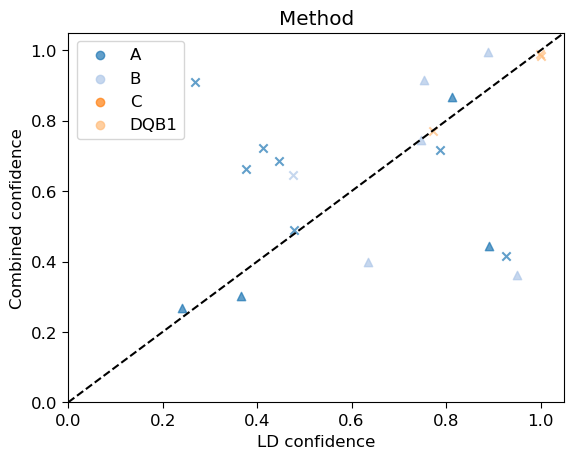

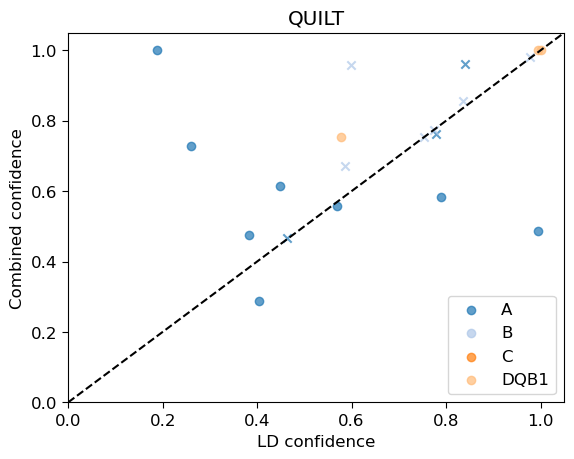

In [242]:
plot_confidence_vs_confidence2(method_df.loc[w5.index, :], genes = ['A', 'B', 'C', 'DQB1'], title = 'Method', plot_equal = True)
plot_confidence_vs_confidence2(original_df.loc[w5.index, :], genes = ['A', 'B', 'C', 'DQB1'], title = 'QUILT', plot_equal = True)

## Comparing GAMCC HLA with GGVP

In [2]:
def extract_smallest_allele(r):
    if '/' in r['allele']:
        allele_string = r['allele']
        alleles = allele_string.split('/')
        smallest_numeric_value = None
        one = alleles[0].split(':')[0]
        for allele in alleles:
            parts = allele.split(':')
            if len(parts) == 2 and parts[1].isdigit():
                numeric_value = int(parts[1])
                if smallest_numeric_value is None or numeric_value < smallest_numeric_value:
                    smallest_numeric_value = numeric_value
                    two = parts[1]
        r['allele'] =  r['Locus'] + '*' + one + ':' + two
    else:
        r['allele'] = r['Locus'] + '*' +  r['allele']
    return r

def calculate_hla_diversity(freq, label = ''):
    entropy = []
    n_allele = []
#     n_ambiguous = []
    hla_diversity = []
    
    for l in HLA_GENES:
        tmp = freq[freq['Locus'] == l]
        n_allele.append(len(tmp['Two field'].unique()))
        entropy.append(lcwgsus.calculate_shannon_entropy(tmp['Two field'].values))
#         entropy.append(lcwgsus.calculate_shannon_entropy_by_gene(tmp['Two field'].values))
#         n_ambiguous.append(len(tmp[tmp['Two field'].str.contains('/')]))
        hla_diversity.append(1 - (tmp['frequency']**2).sum())

#     summary = pd.DataFrame({'Gene': HLA_GENES, 'Shannon Entropy': entropy, 
#                             'Diversity': hla_diversity,
#                             'Number of distinct alleles': n_allele,
#                            'Number of ambiguous type from SBT': n_ambiguous})
    summary = pd.DataFrame({'Gene': HLA_GENES, f'Shannon Entropy ({label})': entropy, 
                            f'Diversity ({label})': hla_diversity,
                            f'Number of distinct alleles ({label})': n_allele})
    return summary

In [65]:
ggvp = "data/hla_direct_sequencing/GGVP_HLA.tsv"
ggvp = pd.read_csv(ggvp, sep = '\t')

alleles = []
counts = []

for a in ggvp['alleles'].unique():
    tmp = ggvp[ggvp['alleles'] == a]
    alleles.append(a)
    counts.append(tmp['allele_count'].sum())

ggvp = pd.DataFrame({'alleles': alleles, 'count': counts})
ggvp['Locus'] = ggvp['alleles'].str.split('*').str.get(0)
ggvp = ggvp[ggvp['Locus'].isin(HLA_GENES)]
ggvp['Two field'] = ggvp['alleles'].str.split('*').str.get(1)
ggvp = ggvp[['Locus', 'Two field', 'count']]

N = 788
ggvp['frequency'] = ggvp['count']/N

hla = lcwgsus.read_hla_direct_sequencing(retain = 'all')
gamcc = lcwgsus.gather_hla_alleles(hla)
gamcc['allele'] = gamcc['Allele'].str.split('*').str.get(1)
gamcc = gamcc[~gamcc['allele'].str.contains('X')]
gamcc = gamcc.apply(extract_smallest_allele, axis = 1)
gamcc = gamcc['allele'].value_counts().reset_index()
gamcc['Locus'] = gamcc['allele'].str.split('*').str.get(0)
gamcc = gamcc.sort_values(by = ['Locus', 'allele'], ascending = True).reset_index(drop = True).rename(columns = {'allele': 'Two field'})
gamcc = gamcc[['Locus', 'Two field', 'count']]
gamcc['Two field'] = gamcc['Two field'].str.split('*').str.get(1)

N = 500
gamcc['frequency'] = gamcc['count']/N

### oneKG ###
panel = pd.read_csv('/well/band/users/rbx225/GAMCC/results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
region = 'AFR'
population = 'GWD'

if region is not None:
    panel = panel[panel['Region'] == region]
if population is not None:
     panel = panel[panel['Population'] == population]
        
lst = []
for l in HLA_GENES:
    tmp = pd.concat([panel['HLA-' + l + ' 1'], panel['HLA-' + l + ' 2']]).reset_index().rename(columns = {0: 'Two field'}).dropna()
    tmp = tmp[~tmp['Two field'].str.contains('/')]
    tmp = tmp['Two field'].value_counts().reset_index()
    tmp['Locus'] = l
    tmp = tmp[['Locus', 'Two field', 'count']].sort_values(by = 'Two field')
    tmp['frequency'] = tmp['count']/tmp['count'].sum()
    lst.append(tmp)
    
gwd = pd.concat(lst)
### oneKG ###

### oneKG ###
panel = pd.read_csv('/well/band/users/rbx225/GAMCC/results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
region = 'AFR'
population = None

if region is not None:
    panel = panel[panel['Region'] == region]
if population is not None:
     panel = panel[panel['Population'] == population]
        
lst = []
for l in HLA_GENES:
    tmp = pd.concat([panel['HLA-' + l + ' 1'], panel['HLA-' + l + ' 2']]).reset_index().rename(columns = {0: 'Two field'}).dropna()
    tmp = tmp[~tmp['Two field'].str.contains('/')]
    tmp = tmp['Two field'].value_counts().reset_index()
    tmp['Locus'] = l
    tmp = tmp[['Locus', 'Two field', 'count']].sort_values(by = 'Two field')
    tmp['frequency'] = tmp['count']/tmp['count'].sum()
    lst.append(tmp)
    
afr = pd.concat(lst)
### oneKG ###

### oneKG ###
panel = pd.read_csv('/well/band/users/rbx225/GAMCC/results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
region = None
population = None

if region is not None:
    panel = panel[panel['Region'] == region]
if population is not None:
     panel = panel[panel['Population'] == population]
        
lst = []
for l in HLA_GENES:
    tmp = pd.concat([panel['HLA-' + l + ' 1'], panel['HLA-' + l + ' 2']]).reset_index().rename(columns = {0: 'Two field'}).dropna()
    tmp = tmp[~tmp['Two field'].str.contains('/')]
    tmp = tmp['Two field'].value_counts().reset_index()
    tmp['Locus'] = l
    tmp = tmp[['Locus', 'Two field', 'count']].sort_values(by = 'Two field')
    tmp['frequency'] = tmp['count']/tmp['count'].sum()
    lst.append(tmp)
    
oneKG = pd.concat(lst)
### oneKG ###

In [66]:
ggvp_sum = calculate_hla_diversity(ggvp, 'GGVP')
gamcc_sum = calculate_hla_diversity(gamcc, 'GAMCC')
gwd_sum = calculate_hla_diversity(gwd, 'GWD')
afr_sum = calculate_hla_diversity(afr, 'AFR')
onekg_sum = calculate_hla_diversity(oneKG, '1KG')

merged = pd.merge(ggvp_sum, gamcc_sum, on = 'Gene')
merged = pd.merge(merged, onekg_sum, on = 'Gene')
merged = pd.merge(merged, afr_sum, on = 'Gene')
merged = pd.merge(merged, gwd_sum, on = 'Gene')
merged

,Gene,Shannon Entropy (GGVP),Diversity (GGVP),Number of distinct alleles (GGVP),Shannon Entropy (GAMCC),Diversity (GAMCC),Number of distinct alleles (GAMCC),Shannon Entropy (1KG),Diversity (1KG),Number of distinct alleles (1KG),Shannon Entropy (AFR),Diversity (AFR),Number of distinct alleles (AFR),Shannon Entropy (GWD),Diversity (GWD),Number of distinct alleles (GWD)
0,A,4.682131,0.948507,108,3.178054,0.939308,24,4.488636,0.938011,89,3.737670,0.941790,42,3.218876,0.933299,25
1,B,4.595120,0.943228,99,3.737670,0.935480,42,5.117994,0.971772,167,4.262680,0.939538,71,3.555348,0.939130,35
2,C,4.595120,0.921648,99,3.178054,0.909380,24,4.330733,0.936339,76,3.663562,0.897776,39,3.091042,0.913990,22
3,DQB1,3.465736,0.803187,32,2.708050,0.811328,15,3.583519,0.917343,36,3.135494,0.884108,23,2.639057,0.838507,14
4,DRB1,4.356709,0.932793,78,3.178054,0.909224,24,4.406719,0.957247,82,3.784190,0.937799,44,3.135494,0.910521,23


Text(0, 0.5, 'HLA diversity')

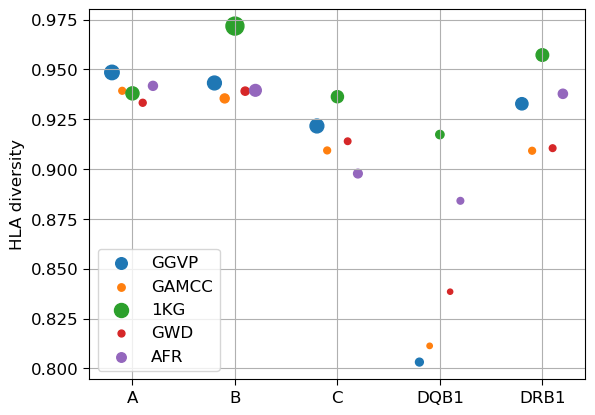

In [48]:
plt.scatter(np.arange(1,6)-0.2, merged['Diversity (GGVP)'], s = merged['Number of distinct alleles (GGVP)'], label = 'GGVP')
plt.scatter(np.arange(1,6)-0.1, merged['Diversity (GAMCC)'], s = merged['Number of distinct alleles (GAMCC)'], label = 'GAMCC')
plt.scatter(np.arange(1,6), merged['Diversity (1KG)'], s = merged['Number of distinct alleles (1KG)'], label = '1KG')
plt.scatter(np.arange(1,6)+0.1, merged['Diversity (GWD)'], s = merged['Number of distinct alleles (GWD)'], label = 'GWD')
plt.scatter(np.arange(1,6)+0.2, merged['Diversity (AFR)'], s = merged['Number of distinct alleles (AFR)'], label = 'AFR')
plt.legend()
ax = plt.gca()
ax.grid(True)
plt.xticks(np.arange(1,6), HLA_GENES)
plt.ylabel('HLA diversity')

In [67]:
gwd.columns = ['Locus', 'Two field', 'count (GWD)', 'frequency (GWD)']
gamcc.columns = ['Locus', 'Two field', 'count (GAMCC)', 'frequency (GAMCC)']
ggvp.columns = ['Locus', 'Two field', 'count (GGVP)', 'frequency (GGVP)']
oneKG.columns = ['Locus', 'Two field', 'count (1KG)', 'frequency (1KG)']
afr.columns = ['Locus', 'Two field', 'count (AFR)', 'frequency (AFR)']

In [68]:
join = 'inner'
alleles = pd.merge(gwd, gamcc, on = ['Locus', 'Two field'], how = join)
alleles = pd.merge(alleles, ggvp, on = ['Locus', 'Two field'], how = join)
alleles = pd.merge(alleles, afr, on = ['Locus', 'Two field'], how = join) 
alleles = pd.merge(alleles, oneKG, on = ['Locus', 'Two field'], how = join).fillna(0)

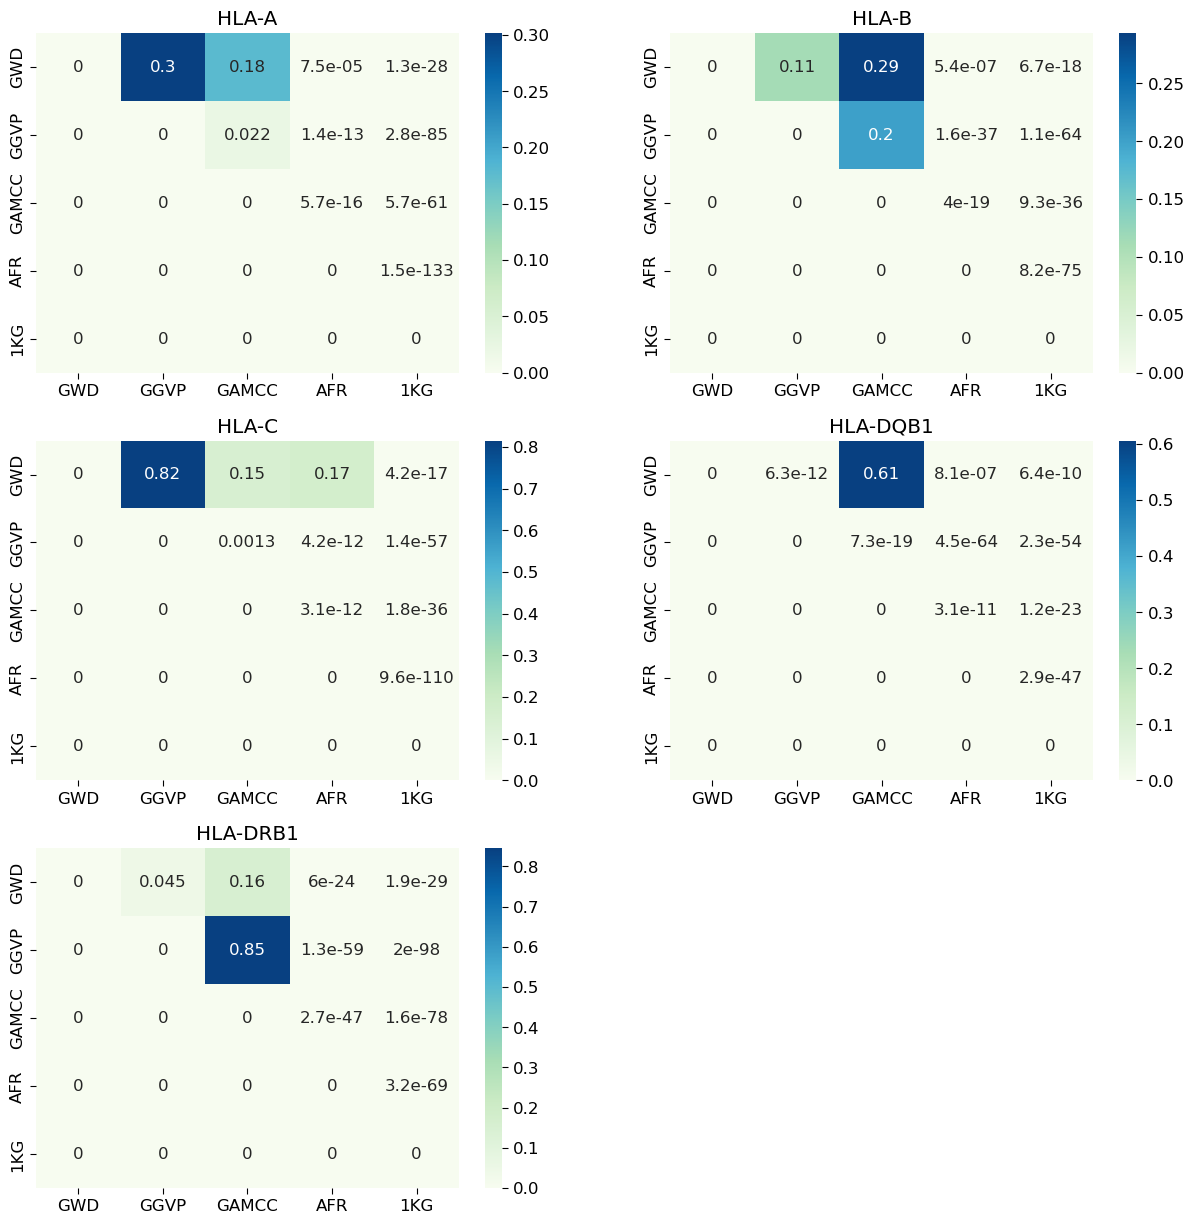

In [69]:
# counts
result = {}
labels = ['GWD', 'GGVP', 'GAMCC', 'AFR', '1KG']
for l in HLA_GENES:
    X = alleles[alleles['Locus'] == l]
    
    X = X[['Two field', 'count (GWD)', 'count (GGVP)', 'count (GAMCC)', 'count (AFR)', 'count (1KG)']].T

    X.columns = X.iloc[0]
    X = X[1:]

    counts_pop1 = list(X.iloc[0, :].values)
    counts_pop2 = list(X.iloc[1, :].values)
    counts_pop3 = list(X.iloc[2, :].values)
    counts_pop4 = list(X.iloc[3, :].values)
    counts_pop5 = list(X.iloc[4, :].values)
    count_lst = [counts_pop1, counts_pop2, counts_pop3, counts_pop4, counts_pop5]
    
    df = pd.DataFrame(index=labels, columns=labels)
    for i in range(4):
        for j in range(i+1, 5):
            contingency_table = np.array([count_lst[i], count_lst[j]])
    # contingency_table = [counts_pop2, counts_pop3]

            res = chi2_contingency(contingency_table, lambda_="log-likelihood")
            df.iloc[i,j] = res.pvalue
    result[l] = df.fillna(0)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i,l in enumerate(HLA_GENES):
    ax = axes[i//2, i%2]
    sns.heatmap(result[l], annot=True, cmap='GnBu', ax = ax)
    ax.set_title(f'HLA-{l}')
fig.delaxes(axes[2,1])

plt.show()

Confidence interval: $$(p_1 - p_2) \pm z*\sqrt{\dfrac{p_1(1-p_1)}{n_1} + \dfrac{p_2(1-p_2)}{n_2}}$$

In [81]:
c1 = alleles[['Locus', 'Two field', 'count (GAMCC)', 'frequency (GAMCC)', 'count (GGVP)', 'frequency (GGVP)']]
c1['z'] = (c1['frequency (GAMCC)'] - c1['frequency (GGVP)'])/np.sqrt(c1['frequency (GAMCC)']*(1-c1['frequency (GAMCC)'])/c1['count (GAMCC)'] + 
           c1['frequency (GGVP)']*(1-c1['frequency (GGVP)'])/c1['count (GGVP)'])
c1[abs(c1['z']) > 1.96]

,Locus,Two field,count (GAMCC),frequency (GAMCC),count (GGVP),frequency (GGVP),z
69,DQB1,02:01,19,0.038,132,0.167513,-2.372307
70,DQB1,03:01,19,0.038,239,0.303299,-5.006419


Text(0, 0.5, 'Allele frequency in GGVP')

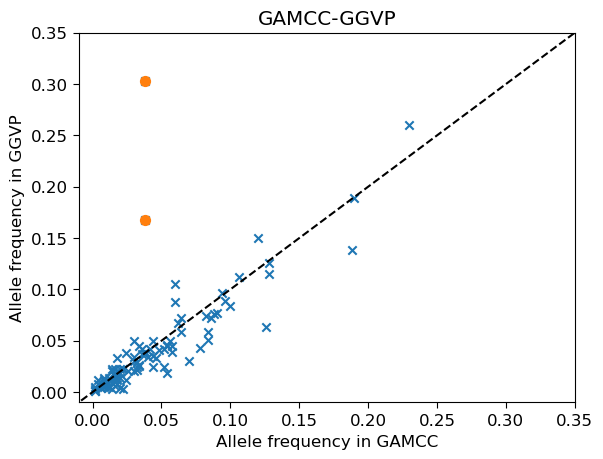

In [118]:
plt.scatter(alleles['frequency (GAMCC)'], alleles['frequency (GGVP)'], marker = 'x')

c1 = alleles[['Locus', 'Two field', 'count (GAMCC)', 'frequency (GAMCC)', 'count (GGVP)', 'frequency (GGVP)']]
c1['z'] = (c1['frequency (GAMCC)'] - c1['frequency (GGVP)'])/np.sqrt(c1['frequency (GAMCC)']*(1-c1['frequency (GAMCC)'])/c1['count (GAMCC)'] + 
           c1['frequency (GGVP)']*(1-c1['frequency (GGVP)'])/c1['count (GGVP)'])
c1 = c1[abs(c1['z']) > 1.96]
plt.scatter(c1['frequency (GAMCC)'], c1['frequency (GGVP)'], marker = 'o', s = 50)

plt.plot(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), ls = '--', c = 'black')
plt.xlim(-0.01,0.35)
plt.ylim(-0.01,0.35)
plt.title('GAMCC-GGVP')
plt.xlabel('Allele frequency in GAMCC')
plt.ylabel('Allele frequency in GGVP')

Text(0, 0.5, 'Allele frequency in GWD')

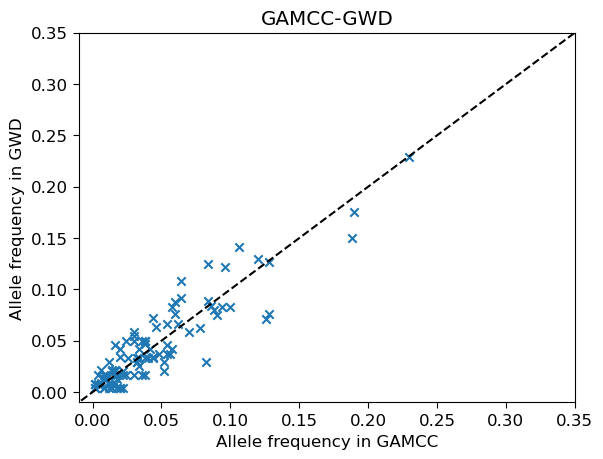

In [119]:
plt.scatter(alleles['frequency (GAMCC)'], alleles['frequency (GWD)'], marker = 'x')

c1 = alleles[['Locus', 'Two field', 'count (GAMCC)', 'frequency (GAMCC)', 'count (GWD)', 'frequency (GWD)']]
c1['z'] = (c1['frequency (GAMCC)'] - c1['frequency (GWD)'])/np.sqrt(c1['frequency (GAMCC)']*(1-c1['frequency (GAMCC)'])/c1['count (GAMCC)'] + 
           c1['frequency (GWD)']*(1-c1['frequency (GWD)'])/c1['count (GWD)'])
c1 = c1[abs(c1['z']) > 1.96]
plt.scatter(c1['frequency (GAMCC)'], c1['frequency (GWD)'], marker = 'o', s = 50)

plt.plot(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), ls = '--', c = 'black')
plt.xlim(-0.01,0.35)
plt.ylim(-0.01,0.35)
plt.title('GAMCC-GWD')
plt.xlabel('Allele frequency in GAMCC')
plt.ylabel('Allele frequency in GWD')

Text(0, 0.5, 'Allele frequency in AFR')

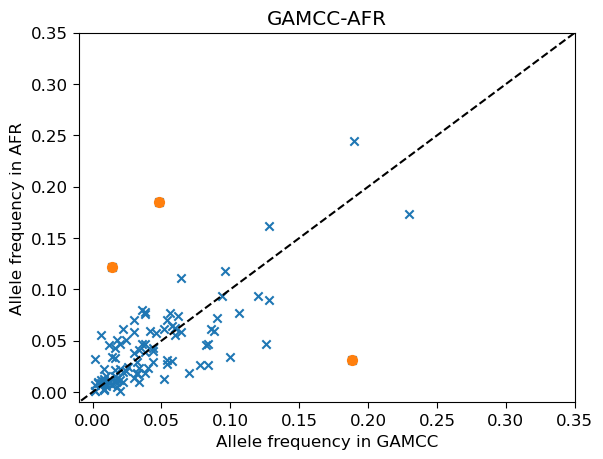

In [120]:
plt.scatter(alleles['frequency (GAMCC)'], alleles['frequency (AFR)'], marker = 'x')

c1 = alleles[['Locus', 'Two field', 'count (GAMCC)', 'frequency (GAMCC)', 'count (AFR)', 'frequency (AFR)']]
c1['z'] = (c1['frequency (GAMCC)'] - c1['frequency (AFR)'])/np.sqrt(c1['frequency (GAMCC)']*(1-c1['frequency (GAMCC)'])/c1['count (GAMCC)'] + 
           c1['frequency (AFR)']*(1-c1['frequency (AFR)'])/c1['count (AFR)'])
c1 = c1[abs(c1['z']) > 1.96]
plt.scatter(c1['frequency (GAMCC)'], c1['frequency (AFR)'], marker = 'o', s = 50)

plt.plot(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), ls = '--', c = 'black')
plt.xlim(-0.01,0.35)
plt.ylim(-0.01,0.35)
plt.title('GAMCC-AFR')
plt.xlabel('Allele frequency in GAMCC')
plt.ylabel('Allele frequency in AFR')

In [31]:
hla = lcwgsus.read_hla_direct_sequencing()
hla_alleles_df = lcwgsus.gather_hla_alleles(hla)

summary = lcwgsus.calculate_hla_entropy(hla_alleles_df)
summary

,Gene,Shannon Entropy,Number of distinct alleles,Number of ambiguous type from SBT
0,A,2.936754,25,0
1,B,3.103069,42,0
2,C,2.694756,25,0
3,DQB1,2.228746,23,294
4,DRB1,2.741211,31,90


## HLA imputation comparison

### New plot

In [27]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')

hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_v3390/', 
                  '/well/band/users/rbx225/GAMCC/results/hla/server/chip_vanilla/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_db/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_merged_ref/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_merged_ref_v3570/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_method/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_method_v3570/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_optimal/',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_chip_sites/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_topmed/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_topmed_chip_sites/chr6.dose.vcf.gz']
labels =  ['original', 'chip:multiEth', 'db', 'merged_ref', 'merged_ref_v3570', 
           'method', 'method_v3570', 'optimal', 'mGenv1_typed_only', 'mGenv1_topmed', 'mGenv1_topmed_typed_only']
modes = ['old', 'old', 'old', 'old', 'test', 'test', 'test', 'old', 'old', 'old']

#### lc

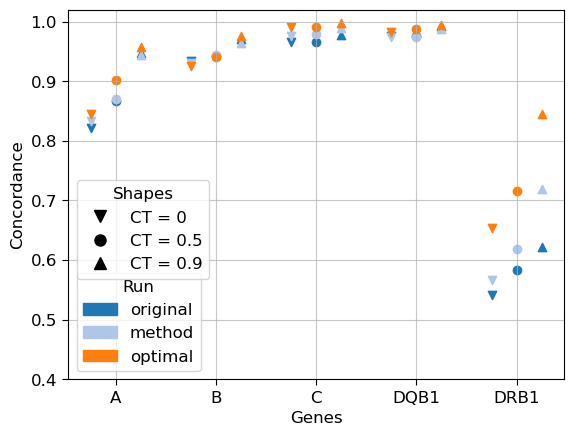

CT              0.0                   0.5                   0.9            
                 CR Concordance        CR Concordance        CR Concordance
Source   Locus                                                             
original A      1.0    0.821429  0.871429    0.866120  0.633333    0.947368
         B      1.0    0.933333  0.980952    0.941748  0.814286    0.970760
         C      1.0    0.966667  1.000000    0.966667  0.952381    0.977500
         DQB1   1.0    0.976190  1.000000    0.976190  0.942857    0.992424
         DRB1   1.0    0.540670  0.838095    0.582857  0.414286    0.622093
method   A      1.0    0.833333  0.904762    0.871053  0.638095    0.944030
         B      1.0    0.930952  0.976190    0.943902  0.847619    0.963483
         C      1.0    0.976190  0.995238    0.978469  0.947619    0.989950
         DQB1   1.0    0.973810  1.000000    0.973810  0.923810    0.987113
         DRB1   1.0    0.566986  0.771429    0.618012  0.395238    0.719512
optimal  A      1.0    0.845238  0.871429    0.901639  0.623810    0.958015
         B      1.0    0.926190  0.957143    0.940299  0.766667    0.975155
         C      1.0    0.990476  0.995238    0.990431  0.952381    0.997500
         DQB1   1.0    0.983333  0.995238    0.988038  0.961905    0.995050
         DRB1   1.0    0.653110  0.776190    0.716049  0.276190    0.844828

In [11]:
indices = [0, 5, 7]
report = lcwgsus.plot_hla_imputation_accuracy_lc(hla, hla_dirs, labels, modes, indices)
report

#### chip

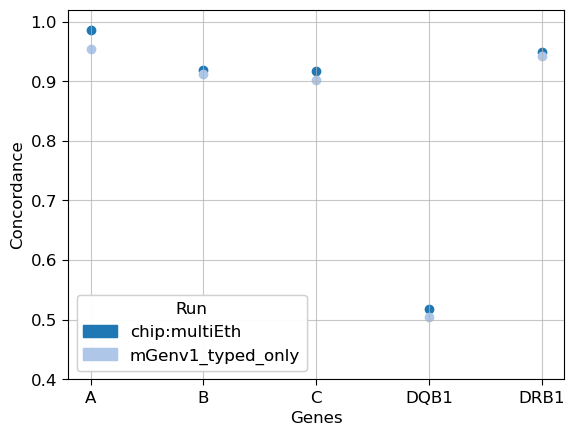

,Source,Locus,Resolution,CT,CR,Concordance
1,chip:multiEth,A,Two field,0,1.0,0.986559
1,mGenv1_typed_only,A,Two field,0,1.0,0.954762
3,chip:multiEth,B,Two field,0,1.0,0.919355
3,mGenv1_typed_only,B,Two field,0,1.0,0.911905
5,chip:multiEth,C,Two field,0,1.0,0.916667
5,mGenv1_typed_only,C,Two field,0,1.0,0.902381
7,chip:multiEth,DQB1,Two field,0,1.0,0.518817
7,mGenv1_typed_only,DQB1,Two field,0,1.0,0.504762
9,chip:multiEth,DRB1,Two field,0,1.0,0.948649
9,mGenv1_typed_only,DRB1,Two field,0,1.0,0.942584


In [9]:
indices = [1,8]
hla_report = lcwgsus.plot_hla_imputation_accuracy_chip(hla, hla_dirs, labels, modes, indices)
hla_report

### Old plot

In [ ]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')

hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_v3390/', 
                  '/well/band/users/rbx225/GAMCC/results/hla/server/chip_vanilla/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_db/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_merged_ref/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_merged_ref_v3570/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_method_archived/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_method_v3570/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_optimal/',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_chip_sites/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_topmed/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_topmed_chip_sites/chr6.dose.vcf.gz']
labels =  ['original', 'chip:multiEth', 'db', 'merged_ref', 'merged_ref_v3570', 
           'method', 'method_v3570', 'optimal', 'mGenv1_typed_only', 'mGenv1_topmed', 'mGenv1_topmed_typed_only']
modes = ['old', 'old', 'old', 'old', 'test', 'test', 'test', 'old', 'old', 'old']

ix = [0, 5]
hla_dir = [hla_dirs[i] for i in ix]
label = [labels[i] for i in ix]

p,report = lcwgsus.plot_hla_imputation_accuracy(hla, hla_dir, label, mode = 'test')
p

### Examinations

In [12]:
raw5 = lcwgsus.read_hla_lc_imputation_results(hla_dirs[5], combined = 'combined', recode_two_field = False, mode = 'test')
raw0 = lcwgsus.read_hla_lc_imputation_results(hla_dirs[0], combined = 'combined', recode_two_field = False)
compared0 = lcwgsus.compare_hla_types(hla, raw0)
compared5 = lcwgsus.compare_hla_types(hla, raw5)

compared5['p_original'] = raw0['prob']
compared5['p_method'] = raw5['prob']

matched = compared0[compared0['Two field match'] == 2].index
matched = matched.intersection(raw5.index)

wrong_compared5 = compared5[compared5['Two field match'] < 2]
wrong_compared5 = wrong_compared5.loc[wrong_compared5.index.intersection(matched)]
wrong_compared5.sort_values(by = ['p_original'])

,SampleID,Locus,One field1,Two field1,One field2,Two field2,One field match,Two field match,Two field total,p_original,p_method
720,GAM684972,A,30,30:02,33,33:01,1,0,2,0.287375,0.325721
140,GAM128604,A,33,33:01,68,68:01,1,1,2,0.466825,0.381603
1015,GAM948563,A,23,23:17,33,33:01,2,1,2,0.475211,0.596535
605,GAM596234,A,03,03:01,33,33:03,1,1,2,0.485610,0.992897
559,GAM538491,DRB1,10,10:01,11,11:02,2,1,2,0.537852,0.698303
314,GAM270698,DRB1,13,13:03,13,13:03,1,1,2,0.566443,0.590490
75,GAM057431,A,30,30:01,33,33:03,2,1,2,0.582758,0.724116
729,GAM692783,DRB1,10,10:01,11,11:02,2,1,2,0.586993,0.851269
840,GAM792085,A,03,03:01,33,33:03,2,1,2,0.614579,0.573970
696,GAM675013,B,07,07:02,07,07:02,2,1,2,0.671597,0.516124


In [13]:
sl = pd.read_csv(SAMPLE_LINKER_FILE)
# sl[sl['Seq_Name'] == 'IDT0764']
sl[sl['Chip_Name'] == 'GAM684972']

# hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
# hla[hla['SampleID'] == 'GAM718643']

,Sample_Name,Seq_Name,Chip_Name
57,GM131,IDT0486,GAM684972


In [6]:
x = lcwgsus.read_hla_lc_imputation_results(hla_dirs[5], combined = 'combined', mode = 'test', recode_two_field = False)
x[x['SampleID'] == 'GAM195843']

,SampleID,Locus,One field1,Two field1,One field2,Two field2,prob
240,GAM195843,A,30,30:02,30,30:01,0.772176
241,GAM195843,B,35,35:01,14,14:02,0.985875
242,GAM195843,C,04,04:01,08,08:02,0.999983
243,GAM195843,DQB1,05,05:01,03,03:19,0.737029
244,GAM195843,DRB1,10,10:01,11,11:01,0.759809


## HLA imputation accuracy by confidence

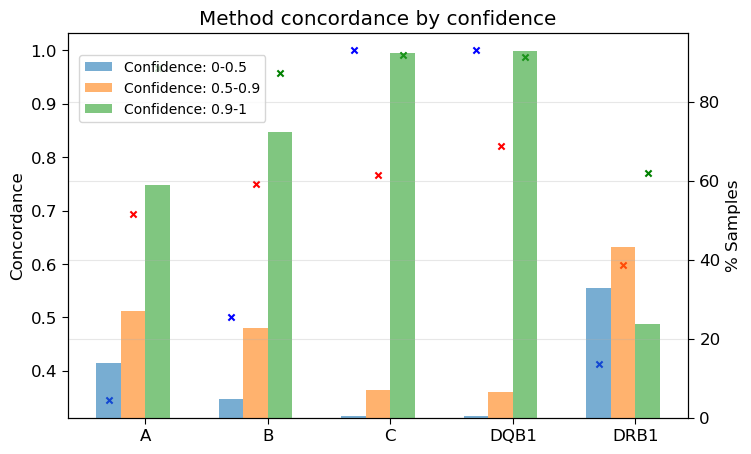

In [14]:
indir = hla_dirs[5]

imputed = lcwgsus.read_hla_lc_imputation_results(indir, combined = 'combined', recode_two_field = False, retain = 'fv')
cutoffs_up = [0.5, 0.9, 1]
cutoffs_down = [0, 0.5, 0.9]
cutoff_labels = []
counts_df = pd.DataFrame(columns = HLA_GENES)

imputed_df_ary = []
true_df_ary = []
for c1, c2 in zip(cutoffs_down, cutoffs_up):
    tmp = imputed[(imputed['prob'] > c1) & (imputed['prob'] <= c2)]
    imputed_df_ary.append(tmp)
    counts_ary = []
    for g in HLA_GENES:
        tmp_g = tmp[tmp['Locus'] == g]
        counts_ary.append(len(tmp_g)*100/210)
    tmp = hla.iloc[tmp.index, :]
    true_df_ary.append(tmp)
    group = f'{c1}-{c2}'
    cutoff_labels.append(group)
    counts_df.loc[len(counts_df), :] = counts_ary
counts_df.index = cutoff_labels

report_ary = []
for i, (df1, df2) in enumerate(zip(imputed_df_ary, true_df_ary)):
    tmp = lcwgsus.compare_hla_types(df1, df2)
    report = lcwgsus.generate_hla_imputation_report(tmp, cutoff_labels[i])
    report_ary.append(report)
    
x = np.arange(len(HLA_GENES))
width = 0.2
n_cutoffs = len(cutoff_labels)

fig, ax1 = plt.subplots(figsize=(8, 5))

for i in range(n_cutoffs):
    report = report_ary[i]
    report = report[report['Resolution'] == 'Two field'].reset_index(drop = True)
    ax1.scatter(x - width * (n_cutoffs / 2) + i * width, report['Concordance'], 
                s = 20, marker = 'x', c = ['blue', 'red', 'green'][i])

ax1.set_ylabel('Concordance')
ax1.set_xticks(x)
ax1.set_xticklabels(HLA_GENES)

ax2 = ax1.twinx()
for i in range(n_cutoffs):
    ax2.bar(x - width * (n_cutoffs / 2) + i * width, counts_df.iloc[i, :], width,
                label=f'Confidence: {cutoff_labels[i]}', alpha = 0.6)
ax2.set_ylabel('% Samples')
ax2.grid(alpha = 0.3)

fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.85), fontsize=10)
plt.title('Method concordance by confidence')
plt.show()

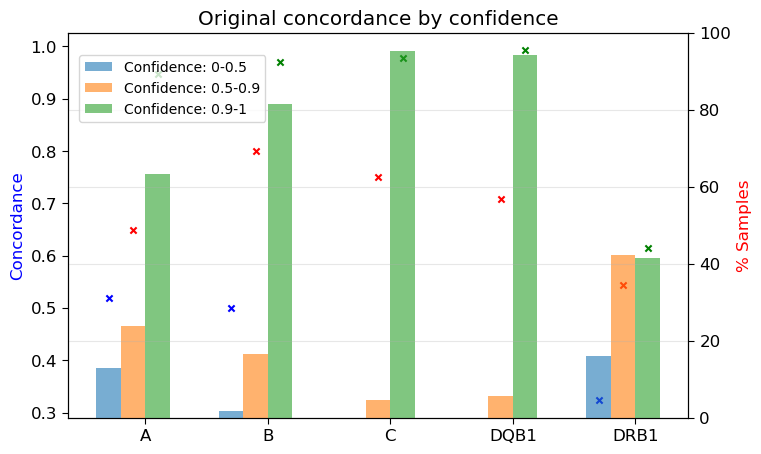

In [88]:
indir = hla_dirs[0]

imputed = lcwgsus.read_hla_lc_imputation_results(indir, combined = 'combined', recode_two_field = False, retain = 'fv')
cutoffs_up = [0.5, 0.9, 1]
cutoffs_down = [0, 0.5, 0.9]
cutoff_labels = []
counts_df = pd.DataFrame(columns = HLA_GENES)

imputed_df_ary = []
true_df_ary = []
for c1, c2 in zip(cutoffs_down, cutoffs_up):
    tmp = imputed[(imputed['prob'] > c1) & (imputed['prob'] <= c2)]
    imputed_df_ary.append(tmp)
    counts_ary = []
    for g in HLA_GENES:
        tmp_g = tmp[tmp['Locus'] == g]
        counts_ary.append(len(tmp_g)*100/210)
    tmp = hla.iloc[tmp.index, :]
    true_df_ary.append(tmp)
    group = f'{c1}-{c2}'
    cutoff_labels.append(group)
    counts_df.loc[len(counts_df), :] = counts_ary
counts_df.index = cutoff_labels

report_ary = []
for i, (df1, df2) in enumerate(zip(imputed_df_ary, true_df_ary)):
    tmp = lcwgsus.compare_hla_types(df1, df2)
    report = lcwgsus.generate_hla_imputation_report(tmp, cutoff_labels[i])
    report_ary.append(report)
    
x = np.arange(len(HLA_GENES))
width = 0.2
n_cutoffs = len(cutoff_labels)

fig, ax1 = plt.subplots(figsize=(8, 5))

for i in range(n_cutoffs):
    report = report_ary[i]
    report = report[report['Resolution'] == 'Two field'].reset_index(drop = True)
    ax1.scatter(x - width * (n_cutoffs / 2) + i * width, report['Concordance'], 
                s = 20, marker = 'x', c = ['blue', 'red', 'green'][i])

ax1.set_ylabel('Concordance', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(HLA_GENES)

ax2 = ax1.twinx()
for i in range(n_cutoffs):
    ax2.bar(x - width * (n_cutoffs / 2) + i * width, counts_df.iloc[i, :], width,
                label=f'Confidence: {cutoff_labels[i]}', alpha = 0.6)
ax2.set_ylabel('% Samples', color='r')
ax2.grid(alpha = 0.3)

fig.legend(loc='upper left', bbox_to_anchor=(0.13, 0.85), fontsize=10)
plt.title('Original concordance by confidence')
plt.show()

## HLA imputation accuracy by type

In [13]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')

hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/imputation/batches_archived/', 
                  '/well/band/users/rbx225/GAMCC/results/hla/server/chip_vanilla/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_db/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_merged_ref/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_merged_ref_v3570/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_method/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_method_v3570/',
                  '/well/band/users/rbx225/GAMCC/results/hla/imputation/QUILT_HLA_result_optimal/',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGen0.9/chr6.dose.vcf.gz']
labels =  ['original', 'chip:multiEth', 'db', 'merged_ref', 'merged_ref_v3570', 'method', 'method_v3570', 'optimal', 'two-stage']

# ix = [5]
# hla_dir = [hla_dirs[i] for i in ix]
# label = [labels[i] for i in ix]

# lcwgsus.plot_hla_imputation_accuracy_by_type(hla, hla_dir, label)

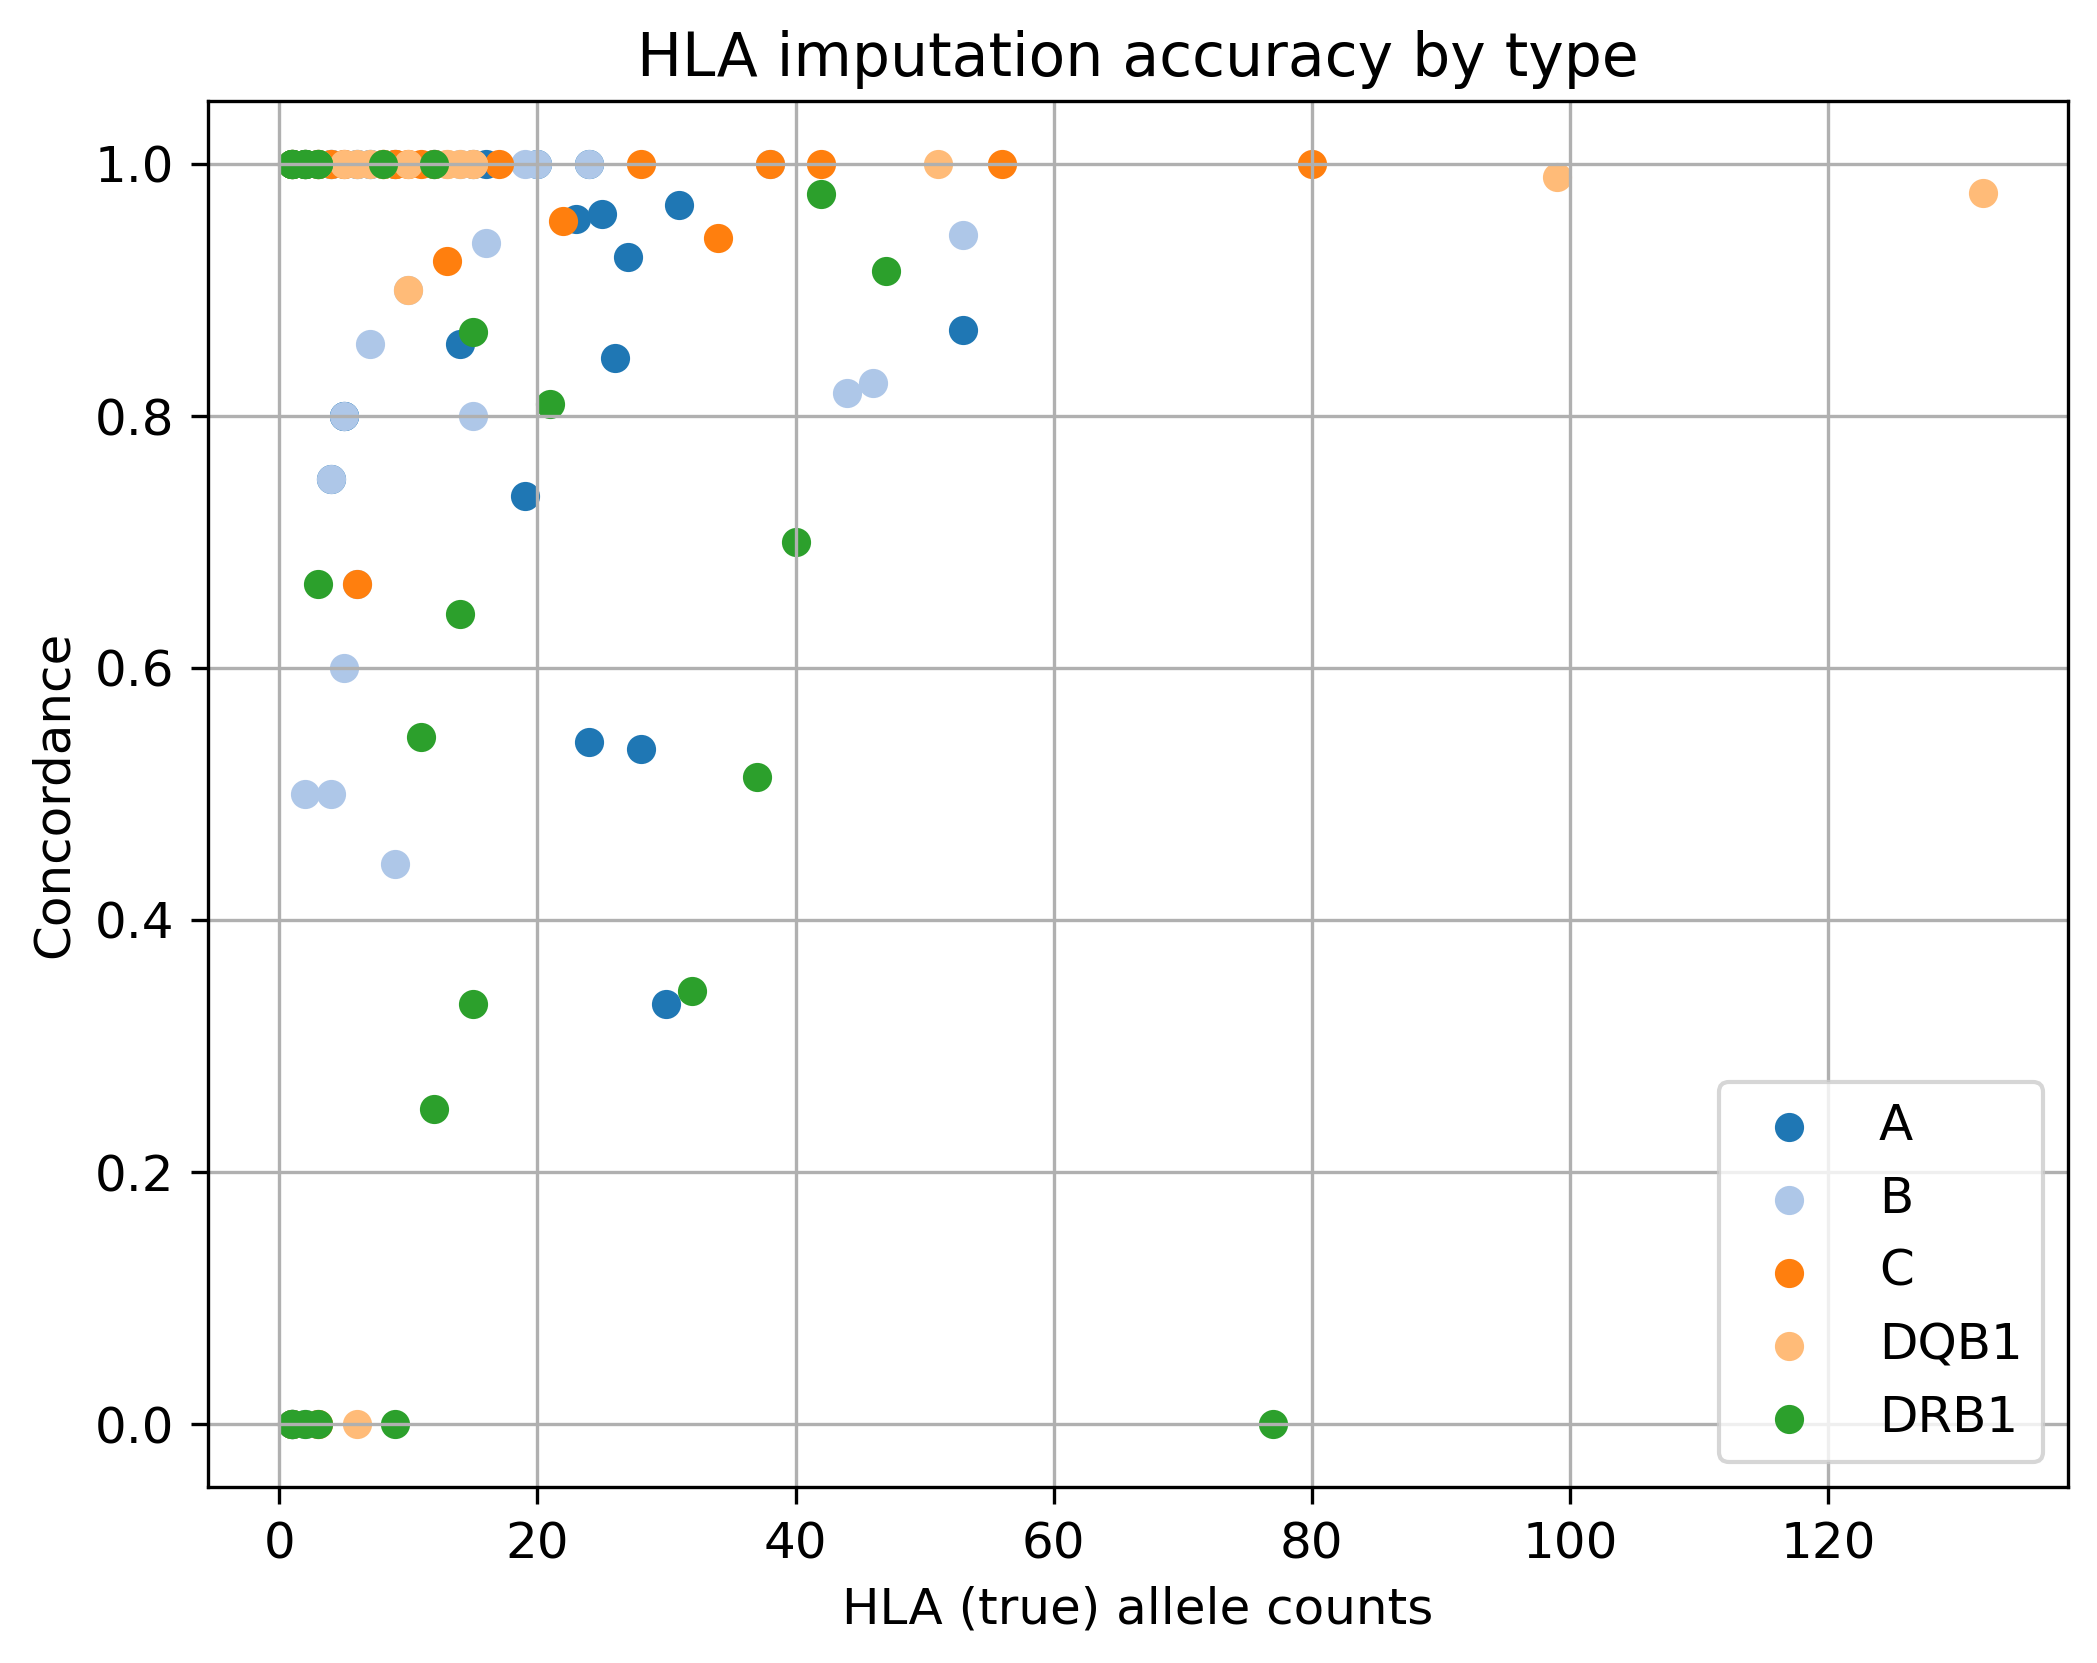

In [21]:
def plot_hla_imputation_accuracy_by_type(hla, hla_dir, labels, title = 'HLA imputation accuracy by type', 
                                         cmap = CATEGORY_CMAP_STR,
                                         save_fig=False, outdir=None, save_name=None):
    lc = lcwgsus.read_hla_lc_imputation_results(hla_dir, retain = 'fv')
    ccd_dict_lc = lcwgsus.compare_hla_types_by_type(hla, lc)
    ccd_dict_lc = lcwgsus.calculate_hla_concordance_by_type(ccd_dict_lc, verbose = False)
    
    fig = plt.figure(figsize=(8, 6), dpi = 300)
    for i, l in enumerate(HLA_GENES):
        df = ccd_dict_lc[l]
        plt.scatter(df['Sum'], df['Accuracy'], c = CATEGORY_CMAP_HEX[i], marker = 'o', label = l)

    ax = plt.gca()
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('HLA (true) allele counts')
    ax.set_ylabel('Concordance')
    ax.set_title(title)
    
    plt.show()
    return ccd_dict_lc

ix = 5
ccd_dict_lc = plot_hla_imputation_accuracy_by_type(hla, hla_dirs[ix], labels[ix])

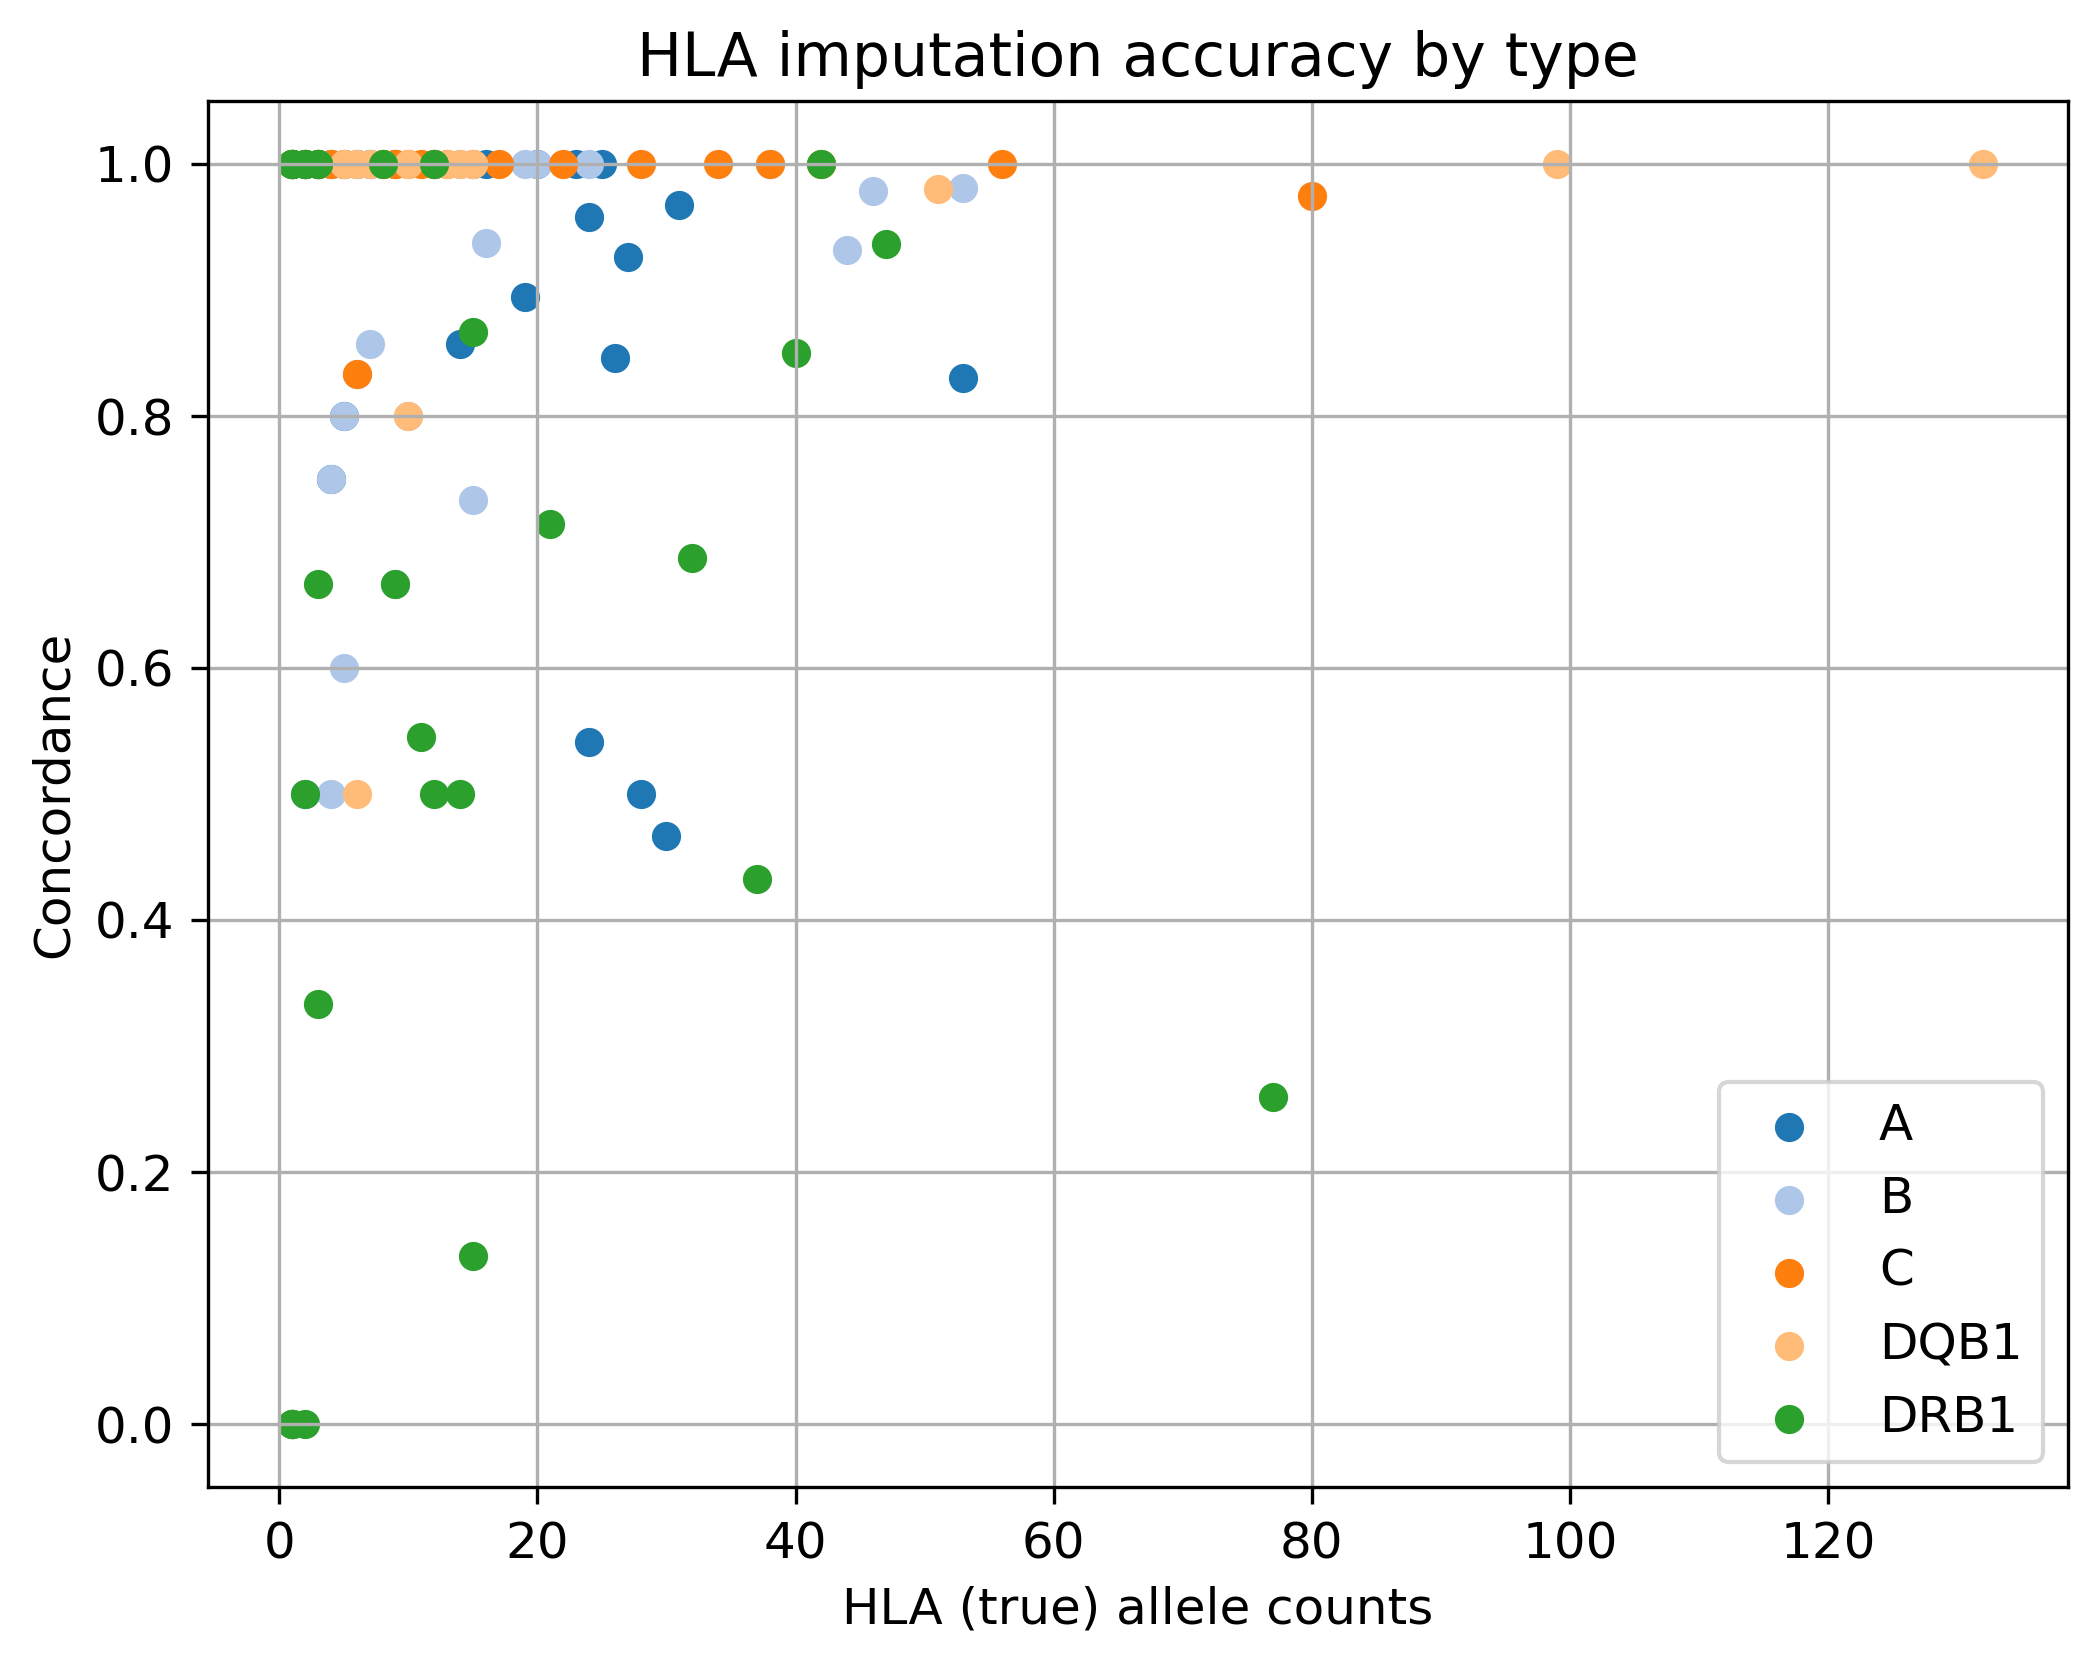

In [16]:
ix = 7
ccd_dict_lc = plot_hla_imputation_accuracy_by_type(hla, hla_dirs[ix], labels[ix])

### Checking DRB1*13:04

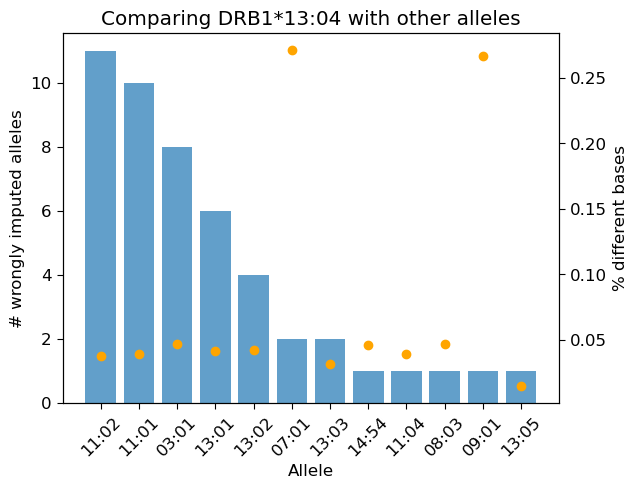

In [19]:
def compare_hla_imputation_one_allele(gene, db, hla_dir, a, combined = 'combined'):
    hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
    hla = hla[~hla.isin(['-9', 'None', 'N/A', '']).any(axis=1) & hla.notna().all(axis=1)]
    hla = hla[hla['Locus'] == gene]
    hla = hla[(hla['Two field1'] == a) | (hla['Two field2'] == a)]

    hla.iloc[:, 3:] = hla.iloc[:, 3:].applymap(lcwgsus.merge_two_field).applymap(lcwgsus.retain_smallest_two_field)
    hla.iloc[:, 5:] = hla.iloc[:, 5:].applymap(lcwgsus.merge_two_field).applymap(lcwgsus.retain_smallest_two_field)

    res = lcwgsus.read_hla_lc_imputation_results(hla_dir, combined = 'onlystates', recode_two_field = False)
    res = res[~res.isin(['-9', 'None', 'N/A', '']).any(axis=1) & res.notna().all(axis=1)]
    res = res[res['Locus'] == gene]
    res = res[res['SampleID'].isin(hla['SampleID'])]

    wrong_alleles_ary = []

    for s in res['SampleID']:
        alleles1 = hla[hla['SampleID'] == s][['Two field1', 'Two field2']].values[0].tolist()
        alleles2 = res[res['SampleID'] == s][['Two field1', 'Two field2']].values[0].tolist()

        if alleles1.count(a) == 2:
            if alleles2.count(a) != 2:
                wrong_alleles = [elem for elem in alleles2 if elem != a]
                for w in wrong_alleles:
                    wrong_alleles_ary.append(w)
        elif alleles1.count(a) == 1:
            another_allele = [elem for elem in alleles1 if elem != a][0]
            if a in alleles2:
                pass
            else:
                if another_allele in alleles2:
                    wrong_allele = [elem for elem in alleles2 if elem != another_allele]
                    if len(wrong_allele) == 0:
                        wrong_alleles_ary.append(another_allele)
                    else:
                        wrong_alleles_ary.append(wrong_allele[0])
                else:
                    pass
        else:
            pass

    counts = Counter(wrong_alleles_ary)
    sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
    labels, values = zip(*sorted_counts)

    reference_allele = db.columns[db.columns.str.startswith(f'{gene}*{a}')][0]
    columns_to_compare = []
    for l in labels:
        columns_to_compare.append(db.columns[db.columns.str.startswith(f'{gene}*{l}')][0])

    diff_ary = []
    for i, c in enumerate(columns_to_compare):
        diff_ary.append((db[c] != db[reference_allele]).sum()/len(db))
        
    fig, ax1 = plt.subplots()
    ax1.bar(labels, values, alpha=0.7)
    ax1.set_xlabel("Allele")
    ax1.set_ylabel("# wrongly imputed alleles")
    ax1.tick_params(axis='y', labelcolor='black')
    plt.xticks(rotation=45)

    ax2 = ax1.twinx()  
    ax2.plot(labels, diff_ary, marker='o', color = 'orange', linestyle='None')
    ax2.set_ylabel("% different bases")
    ax2.tick_params(axis='y', labelcolor='black')

    plt.title(f"Comparing {gene}*{a} with other alleles")
    plt.show()
    
    return labels, diff_ary

a = '13:04'
gene = 'DRB1'
hla_dir = hla_dirs[6]
db = pd.read_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3570_merged_only/{gene}.ssv', sep = ' ')

alleles, counts = compare_hla_imputation_one_allele(gene, db, hla_dir, a, combined = 'combined')

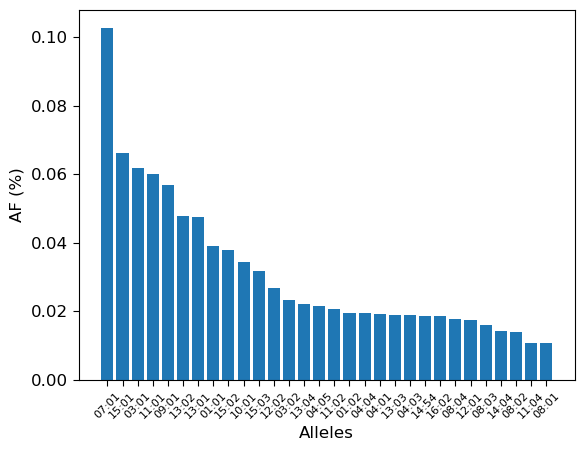

In [205]:
hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
A_alleles = hlatypes['HLA-DRB1 1'].tolist() + hlatypes['HLA-DRB1 2'].tolist()
counts = Counter(A_alleles)
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
labels, values = zip(*sorted_counts)

common_alleles = np.array(values)
common_alleles = common_alleles[common_alleles > 50]
plt.bar(range(len(common_alleles)), common_alleles/(2*len(hlatypes)))
plt.xticks(range(len(common_alleles)), list(labels)[:len(common_alleles)], rotation = 45, fontsize = 8)
plt.ylabel('AF (%)')
plt.xlabel('Alleles')
plt.show()

### Checking A alleles

In [206]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
hla_dir = hla_dirs[4]
label = labels[4]
lc = lcwgsus.read_hla_lc_imputation_results(hla_dir, retain = 'fv')
ccd_dict_lc = lcwgsus.compare_hla_types_by_type(hla, lc)
ccd_dict_lc = lcwgsus.calculate_hla_concordance_by_type(ccd_dict_lc, verbose = False)
# ccd_dict_lc['A'].sort_values(by = 'Accuracy', ascending = True)
low_r2_alleles = ccd_dict_lc['A'].sort_values(by = 'Accuracy', ascending = True).iloc[1:5, 0].index.tolist()

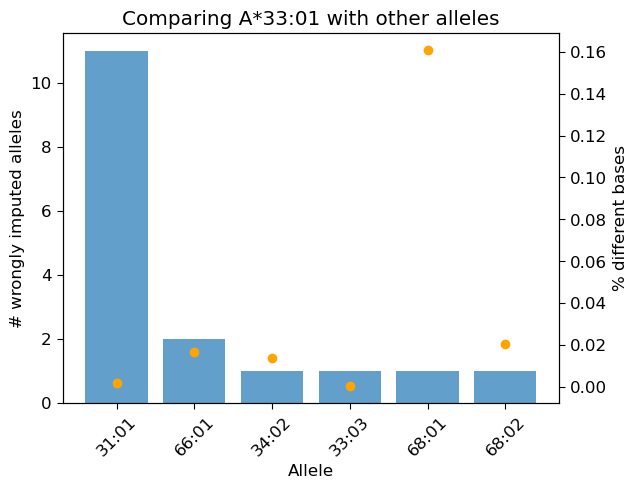

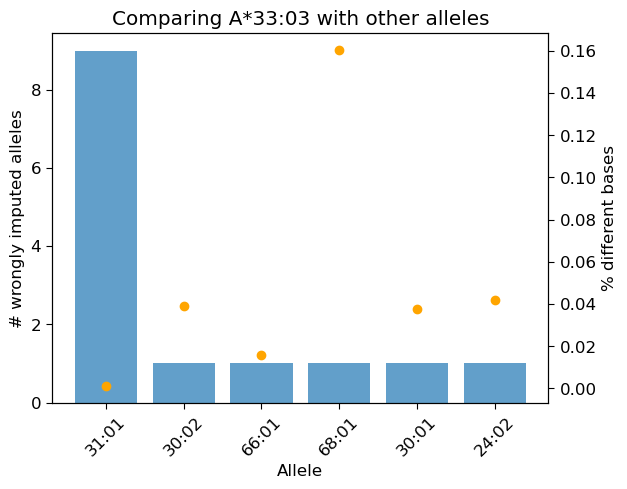

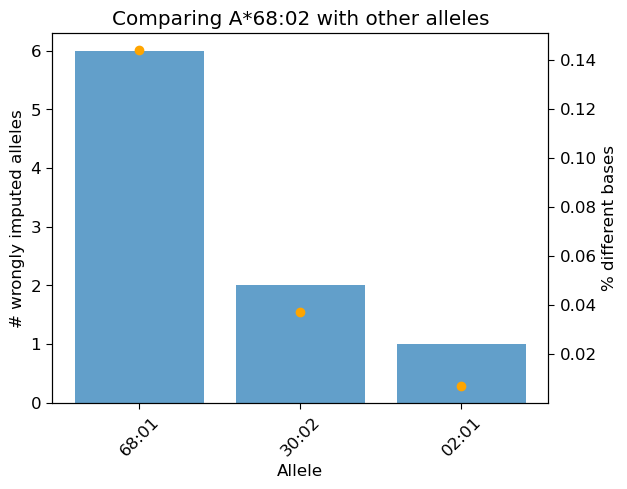

ValueError: not enough values to unpack (expected 2, got 0)

In [207]:
gene = 'A'
hla_dir = hla_dirs[4]
db = pd.read_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3570_aligners/{gene}.ssv', sep = ' ')

for a in low_r2_alleles:
    alleles, counts = compare_hla_imputation_one_allele(gene, db, hla_dir, a, combined = 'combined')

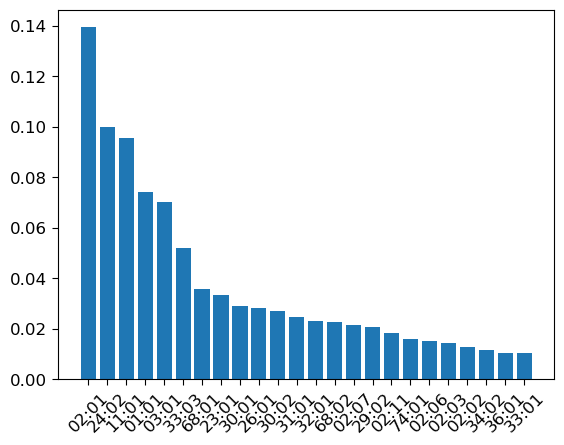

In [209]:
hlatypes = pd.read_csv('results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
A_alleles = hlatypes['HLA-A 1'].tolist() + hlatypes['HLA-A 2'].tolist()
counts = Counter(A_alleles)
sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
labels, values = zip(*sorted_counts)

common_alleles = np.array(values)
common_alleles = common_alleles[common_alleles > 50]
plt.bar(range(len(common_alleles)), common_alleles/(2*len(hlatypes)))
plt.xticks(range(len(common_alleles)), list(labels)[:len(common_alleles)], rotation = 45)
plt.show()

## Paired HLA alleles LD heatmaps

### Haplotypes

In [47]:
samples = lcwgsus.read_tsv_as_lst(FV_IDT_NAMES_FILE)
hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
hlatypes = hlatypes[hlatypes['Sample ID'].isin(samples)].iloc[:,2:].reset_index(drop = True)

hlahaptypes = pd.DataFrame(columns = ['Sample ID', 'c1h1', 'c1h2', 'c2h1', 'c2h2'])

for i, s in enumerate(hlatypes['Sample ID']):
    types = hlatypes.iloc[i, 1:].values
    c1h1= f'B*{types[2]}-C*{types[4]}-A*{types[0]}'
    c1h2  = f'B*{types[3]}-C*{types[5]}-A*{types[1]}'
    c2h1 = f'DQB1*{types[6]}-DRB1*{types[8]}'
    c2h2  = f'DQB1*{types[7]}-DRB1*{types[9]}'
    hlahaptypes.loc[len(hlahaptypes)] = [s, c1h1, c1h2, c2h1, c2h2]

c1_haps = np.unique(np.array(sorted(hlahaptypes['c1h1'].tolist() + hlahaptypes['c1h2'].tolist())))
class1 = np.zeros((len(hlatypes), len(c1_haps)))
c2_haps = np.unique(np.array(sorted(hlahaptypes['c2h1'].tolist() + hlahaptypes['c2h2'].tolist())))
class2 = np.zeros((len(hlatypes), len(c2_haps)))

for ix in range(len(hlatypes)):
    class1_haps = hlahaptypes.iloc[ix, 1:3].values
    indices = np.array([np.where(c1_haps == a)[0][0] for a in class1_haps if a in c1_haps])
    unique, counts = np.unique(indices, return_counts=True)
    class1[ix, unique] = counts
    
    class2_haps = hlahaptypes.iloc[ix, 3:5].values
    indices = np.array([np.where(c2_haps == a)[0][0] for a in class2_haps if a in c2_haps])
    unique, counts = np.unique(indices, return_counts=True)
    class2[ix, unique] = counts
    
class1 = pd.DataFrame(class1, columns = c1_haps)
class1['Sample ID'] = hlatypes['Sample ID']
class1 = class1[['Sample ID'] + list(c1_haps)]

ld_matrix1 = np.zeros((len(c1_haps), len(c1_haps)))

for i in range(len(c1_haps)):
    for j in range(len(c1_haps)):
        if i == j:
            ld_matrix1[i, j] = 1
        else:
            r, _ = pearsonr(class1[c1_haps[i]], class1[c1_haps[j]])
            ld_matrix1[i, j] = r

ld1 = pd.DataFrame(ld_matrix1, index=c1_haps, columns=c1_haps)

class2 = pd.DataFrame(class2, columns = c2_haps)
class2['Sample ID'] = hlatypes['Sample ID']
class2 = class2[['Sample ID'] + list(c2_haps)]

ld_matrix2 = np.zeros((len(c2_haps), len(c2_haps)))

for i in range(len(c2_haps)):
    for j in range(len(c2_haps)):
        if i == j:
            ld_matrix2[i, j] = 1
        else:
            r, _ = pearsonr(class2[c2_haps[i]], class2[c2_haps[j]])
            ld_matrix2[i, j] = r

ld2 = pd.DataFrame(ld_matrix2, index=c2_haps, columns=c2_haps)

ValueError: Shape of passed values is (326, 326), indices imply (210, 210)

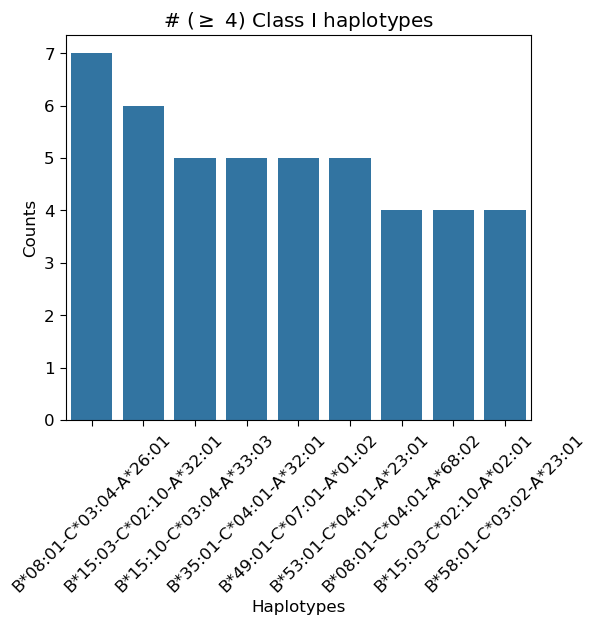

In [83]:
col_sums = class1.iloc[:,1:].sum()
filtered_sums = col_sums[col_sums >= 4].sort_values(ascending=False)

plt.figure(figsize=(6, 5))
sns.barplot(x=filtered_sums.index, y=filtered_sums.values)
plt.xlabel("Haplotypes")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.title("# ($\geq$ 4) Class I haplotypes")
plt.show()

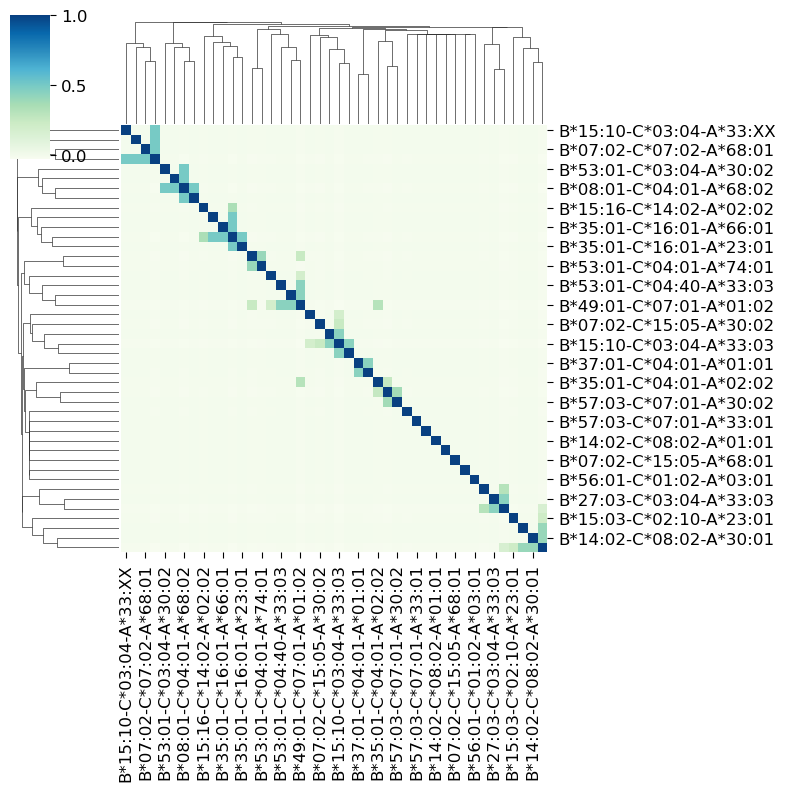

In [75]:
max_corr = abs(ld1).where(~np.eye(ld1.shape[0], dtype=bool)).max(axis=1)
mask = max_corr > 0.5
filtered_df = ld1.loc[~mask, ~mask]
im = sns.clustermap(filtered_df, cmap="GnBu", method="average", figsize=(8, 8))

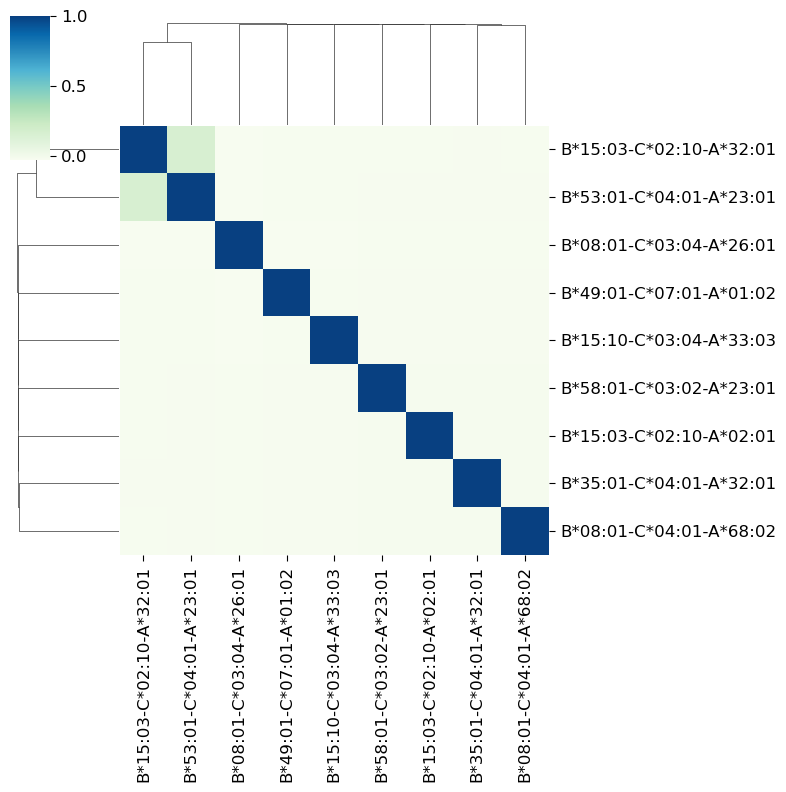

In [78]:
filtered_haps = filtered_sums.index

filtered_df = ld1.loc[filtered_haps, filtered_haps]
im = sns.clustermap(filtered_df, cmap="GnBu", method="average", figsize=(8, 8))

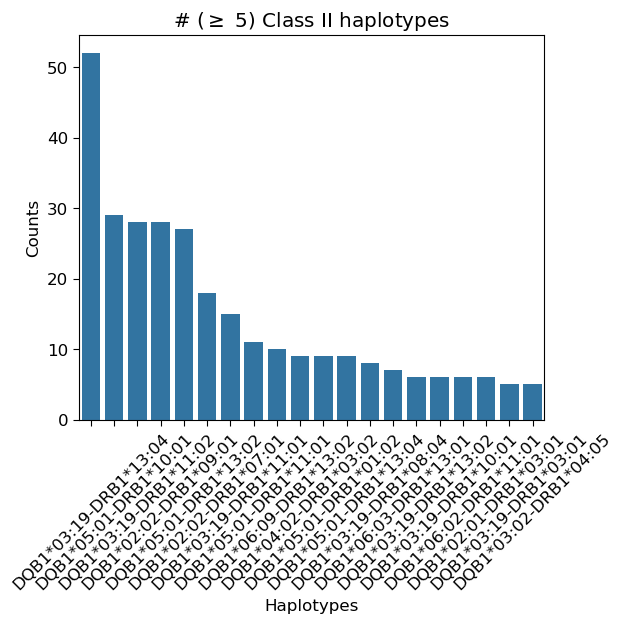

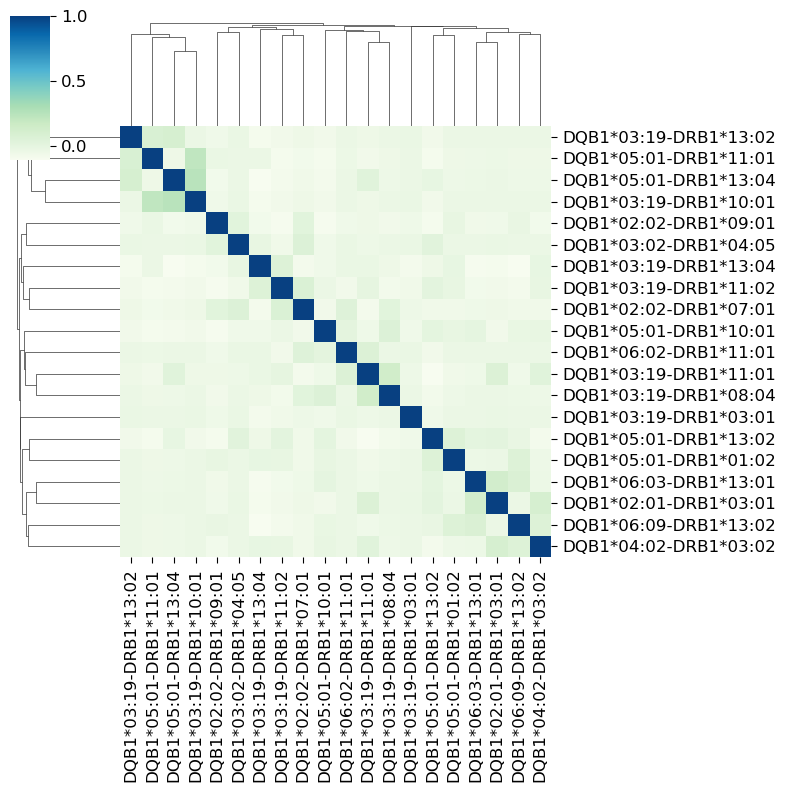

In [92]:
col_sums = class2.iloc[:,1:].sum()
filtered_sums = col_sums[col_sums >= 5].sort_values(ascending=False)

plt.figure(figsize=(6, 5))
sns.barplot(x=filtered_sums.index, y=filtered_sums.values)
plt.xlabel("Haplotypes")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.title("# ($\geq$ 5) Class II haplotypes")
plt.show()

filtered_haps = filtered_sums.index
filtered_df = ld2.loc[filtered_haps, filtered_haps]
im = sns.clustermap(filtered_df, cmap="GnBu", method="average", figsize=(8, 8))

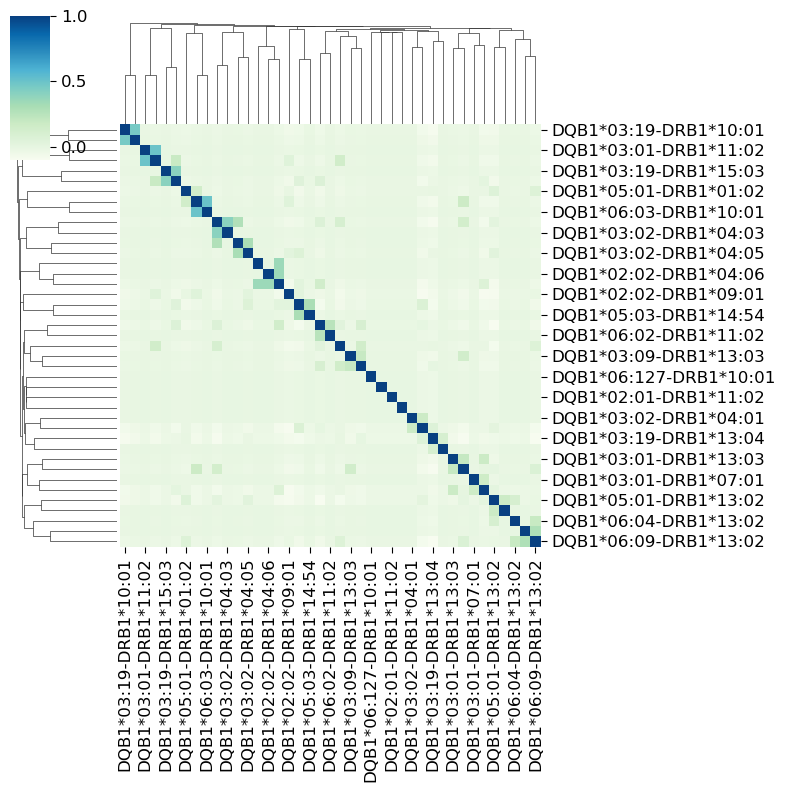

In [91]:
max_corr = abs(ld2).where(~np.eye(ld2.shape[0], dtype=bool)).max(axis=1)
mask = max_corr > 0.5
filtered_df = ld2.loc[~mask, ~mask]
im = sns.clustermap(filtered_df, cmap="GnBu", method="average", figsize=(8, 8))

### Allele frequencies

In [115]:
samples = lcwgsus.read_tsv_as_lst(FV_IDT_NAMES_FILE)
hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
hlatypes = hlatypes[hlatypes['Sample ID'].isin(samples)].iloc[:,2:].reset_index(drop = True)

gamcc_alleles = []
for g in HLA_GENES:
    alleles = lcwgsus.extract_unique_two_field_resolution_from_hlatypes(hlatypes, g)
    alleles = [f'{g}*{a}' for a in alleles]
    gamcc_alleles = gamcc_alleles + alleles
gamcc_alleles = np.array(gamcc_alleles)

AF = {}
for g in HLA_GENES:
    alleles = np.array((f'{g}*' + hlatypes[f'HLA-{g} 1']).tolist() + (f'{g}*' + hlatypes[f'HLA-{g} 2']).tolist())
    unique_alleles = [a for a in gamcc_alleles if a.startswith(g)]

    for a in unique_alleles:
        if a is not None:
            indices = np.array(np.where(alleles == a)[0])
            AF[a] = len(indices)/420

gamcc_AFs = pd.DataFrame({'Allele': AF.keys(), 'AF': AF.values()})
gamcc_AFs.sort_values(by = 'AF', ascending = False)

,Allele,AF
94,DQB1*03:19,0.330952
96,DQB1*05:01,0.235714
72,C*04:01,0.190476
122,DRB1*13:04,0.183333
90,DQB1*02:02,0.142857
...,...,...
103,DQB1*06:127,0.002381
27,B*08:12,0.002381
87,C*17:03,0.002381
29,B*14:01,0.002381


In [118]:
p = 0.33
q = 0.1833
pq = 0.124

D = pq - p*q
r = D**2/(p*q*(1-p)*(1-q))
r

0.12186644395123607

### Alleles

In [189]:
samples = lcwgsus.read_tsv_as_lst(FV_IDT_NAMES_FILE)
hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
hlatypes = hlatypes[hlatypes['Sample ID'].isin(samples)].iloc[:,2:].reset_index(drop = True)

gamcc_alleles = []
for g in HLA_GENES:
    alleles = lcwgsus.extract_unique_two_field_resolution_from_hlatypes(hlatypes, g)
    alleles = [f'{g}*{a}' for a in alleles]
    gamcc_alleles = gamcc_alleles + alleles
gamcc_alleles = np.array(gamcc_alleles)

for c in hlatypes.columns[1:]:
    gene = c.split('-')[1].split(' ')[0]
    hlatypes[c] = gene + '*' + hlatypes[c]

allele_matrix = np.zeros((len(hlatypes), len(gamcc_alleles)))
for ix in range(len(hlatypes)):
    sample_alleles = hlatypes.iloc[ix, 1:].values
    indices = np.array([np.where(gamcc_alleles == a)[0][0] for a in sample_alleles if a in gamcc_alleles])
    unique, counts = np.unique(indices, return_counts=True)
    allele_matrix[ix, unique] = counts

data = pd.DataFrame(allele_matrix, columns = gamcc_alleles)
data['Sample ID'] = hlatypes['Sample ID']
data = data[['Sample ID'] + list(gamcc_alleles)]

ld_matrix = np.zeros((len(gamcc_alleles), len(gamcc_alleles)))

for i in range(len(gamcc_alleles)):
    for j in range(len(gamcc_alleles)):
        if i == j:
            ld_matrix[i, j] = 1
        else:
            r, _ = pearsonr(data[gamcc_alleles[i]], data[gamcc_alleles[j]])
            ld_matrix[i, j] = r

ld_df = pd.DataFrame(ld_matrix, index=gamcc_alleles, columns=gamcc_alleles)

max_corr = abs(ld_df).where(~np.eye(ld_df.shape[0], dtype=bool)).max(axis=1)  # Exclude diagonal
mask = max_corr >= 0.5
filtered_df = ld_df.loc[~mask, ~mask]
sns.clustermap(filtered_df, cmap="coolwarm", method="average", figsize=(12, 10))

,Sample ID,A*01:01,A*01:02,A*02:01,A*02:02,A*02:05,A*03:01,A*23:01,A*23:17,A*24:02,...,DRB1*10:01,DRB1*11:01,DRB1*11:02,DRB1*13:01,DRB1*13:02,DRB1*13:03,DRB1*13:04,DRB1*14:54,DRB1*15:03,DRB1*16:02
0,IDT0481,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IDT0482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IDT0483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IDT0484,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,IDT0485,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,IDT0764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
206,IDT0765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
207,IDT0766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
208,IDT0767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing

## recode v3570 DRB1_gen.txt file

In [3]:
input_file = "/well/band/users/rbx225/recyclable_files/hla_reference_files/alignments_v3570/DRB1_gen.txt"
output_file = "/well/band/users/rbx225/recyclable_files/hla_reference_files/DRB1_gen.txt"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        if line.startswith(" DRB1*01:01:01:01"):
            line = line.replace('*', '.')
        outfile.write(line)

## Produce hlatypes for GAMCC

In [ ]:
gamcc_hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv', unique_two_field = True)
gamcc_hla = gamcc_hla[['SampleID', 'Locus', 'Two field1', 'Two field2']].reset_index(drop = True)

colnames = ['Sample ID'] + [label for g in HLA_GENES for label in [f'HLA-{g} 1', f'HLA-{g} 2']]
hlatypes = pd.DataFrame(columns = colnames)
for s in gamcc_hla['SampleID'].unique():
    tmp = gamcc_hla[gamcc_hla['SampleID'] == s]
    row = [s] + tmp[['Two field1', 'Two field2']].values.ravel().tolist()
    hlatypes.loc[len(hlatypes)] = row
hlatypes.to_csv('data/hla_direct_sequencing/GAMCC_hlatypes.tsv', sep = '\t', index = False, header = True)

## Produce hla_gene_information file with all genes (including the ones not seen in NCBI refseq)

In [14]:
hla_gene_information = pd.read_csv('/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information.tsv', sep = ' ')

files = glob.glob('/well/band/users/rbx225/recyclable_files/hla_reference_files/alignments/*_gen.txt')
all_genes = [i.split('/')[-1].split('_')[0] for i in files]
NCBI_included_genes = hla_gene_information['Name'].str.split('-').str.get(1).tolist()

for g in all_genes:
    if g not in NCBI_included_genes:
        hla_gene_information.loc[len(hla_gene_information)] = [f'HLA-{g}', 'chr6', 0, 0, 1]

ofile = '/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information_expanded.tsv'
hla_gene_information.to_csv(ofile, sep = ' ', index = False)
# Manually editing this afterwards according to the IMGT db

## Clean original 1KG ambiguous alleles

In [ ]:
hlatypes = pd.read_csv('/well/band/users/rbx225/GAMCC/results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
hlatypes = hlatypes.fillna('')
hlatypes.iloc[:, 3:] = hlatypes.iloc[:, 3:].applymap(lcwgsus.merge_two_field_succinct)
hlatypes.iloc[:, 3:] = hlatypes.iloc[:, 3:].applymap(lcwgsus.retain_smallest_two_field)

hlatypes = hlatypes.applymap(lambda x: '' if (',' in str(x) or (x == pd.NaT)) else x)
for c in hlatypes.columns[3:]:
    hlatypes[c] = hlatypes[c].str.replace('*', '')
    hlatypes[c] = hlatypes[c].fillna('')
    
hlatypes = hlatypes.replace('', 'N/A')
    
hlatypes.to_csv('/well/band/users/rbx225/GAMCC/results/hla/imputation/ref_panel/auxiliary_files/HLA_oneKG_no_ambiguous.txt', sep = '\t', header = True, index = False)

## Removing unseen alleles from HLA db

In [ ]:
hla_gene_information = pd.read_csv('/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information.tsv', sep = ' ')
for gene in HLA_GENES:
    db = pd.read_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3390_aligners/{gene}.ssv', sep = ' ')
    hlatypes = pd.read_csv('results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
    alleles = lcwgsus.extract_unique_two_field_resolution_from_hlatypes(hlatypes, gene)
    db_filtered = db[[c for c in db.columns if any(":".join(c.split(':')[:2]) == (f'{gene}*{a}') for a in alleles)]]
    db_filtered.to_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3390_oneKG_only/{gene}.ssv', sep = ' ', index = False)
    
hla_gene_information = pd.read_csv('/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information.tsv', sep = ' ')
for gene in HLA_GENES:
    db = pd.read_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3570_aligners/{gene}.ssv', sep = ' ')
    hlatypes = pd.read_csv('results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
    alleles = lcwgsus.extract_unique_two_field_resolution_from_hlatypes(hlatypes, gene)
    db_filtered = db[[c for c in db.columns if any(":".join(c.split(':')[:2]) == (f'{gene}*{a}') for a in alleles)]]
    db_filtered.to_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3570_oneKG_only/{gene}.ssv', sep = ' ', index = False)
    
hla_gene_information = pd.read_csv('/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information.tsv', sep = ' ')
for gene in HLA_GENES:
    db = pd.read_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3390_aligners/{gene}.ssv', sep = ' ')
    hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
    alleles = lcwgsus.extract_unique_two_field_resolution_from_hlatypes(hlatypes, gene)
    db_filtered = db[[c for c in db.columns if any(":".join(c.split(':')[:2]) == (f'{gene}*{a}') for a in alleles)]]
    db_filtered.to_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3390_merged_only/{gene}.ssv', sep = ' ', index = False)
    
hla_gene_information = pd.read_csv('/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information.tsv', sep = ' ')
for gene in HLA_GENES:
    db = pd.read_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3570_aligners/{gene}.ssv', sep = ' ')
    hlatypes = pd.read_csv('results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv', sep = '\t')
    alleles = lcwgsus.extract_unique_two_field_resolution_from_hlatypes(hlatypes, gene)
    db_filtered = db[[c for c in db.columns if any(":".join(c.split(':')[:2]) == (f'{gene}*{a}') for a in alleles)]]
    db_filtered.to_csv(f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v3570_merged_only/{gene}.ssv', sep = ' ', index = False)

## Get all HLA genes in the alignments directory

In [ ]:
directory = '/well/band/users/rbx225/recyclable_files/hla_reference_files/alignments_v3390/'
files = glob.glob(os.path.join(directory, '*_gen.txt'))
HLA_GENES_ALL = sorted([os.path.basename(f).replace('_gen.txt', '') for f in files])

## Prepare fasta for graph aligner

In [ ]:
version = '3390'
indir = f'/well/band/users/rbx225/recyclable_files/hla_reference_files/v{version}_aligners/'

for gene in HLA_GENES_ALL_EXPANDED:
    db = pd.read_csv(f'{indir}{gene}.ssv', sep = ' ')
    lcwgsus.write_db_as_fasta_per_allele(db, f'/well/band/users/rbx225/recyclable_files/hla_reference_files/tmp/{gene}.fasta')

ifasta = '/well/band/users/rbx225/recyclable_files/hla_reference_files/DRB26789.fasta'
ofasta = '/well/band/users/rbx225/recyclable_files/hla_reference_files/DRB26789_reversed.fasta'

def reverse_complement(seq, complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C', 'N': 'N'}):
    return "".join(complement[base] for base in reversed(seq))

def reverse_complement_fasta(input_fasta):
    result = {}
    with open(input_fasta, "r") as infile:
        seq_id = None
        sequence = []
        
        for line in infile:
            line = line.strip()
            if line.startswith(">"):
                seq_id = line.split('-')[1]
                sequence = []
            else:
                sequence.append(line.upper())
        
            result[seq_id] = reverse_complement(''.join(sequence))
    return result

d = reverse_complement_fasta(ifasta)
                
lcwgsus.write_dict_as_fasta(d, ofasta)

# Phasing

## Phasing graphs

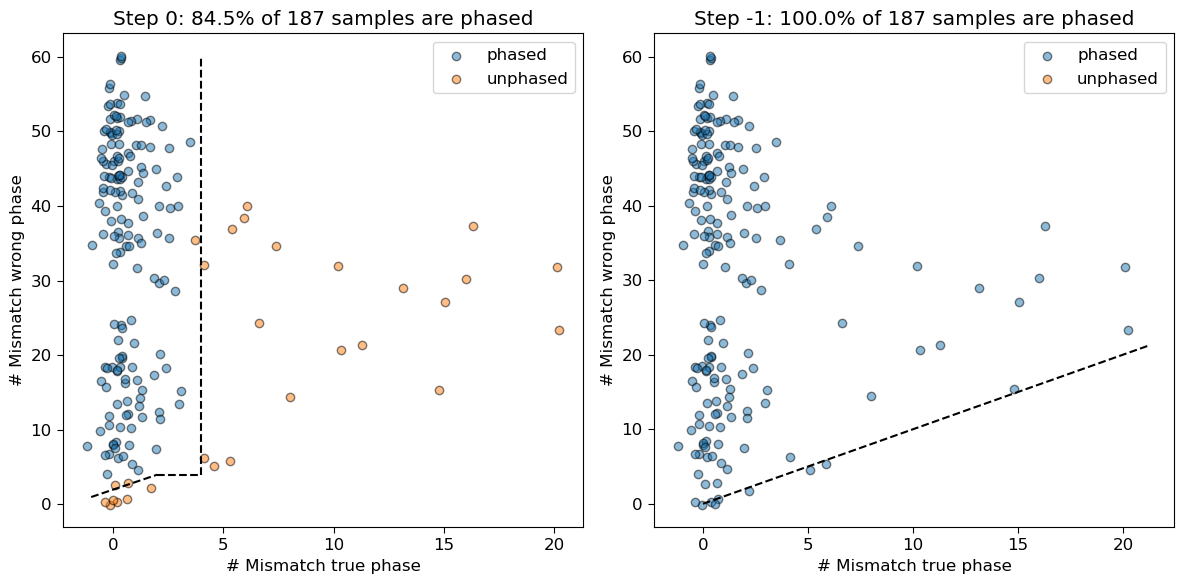

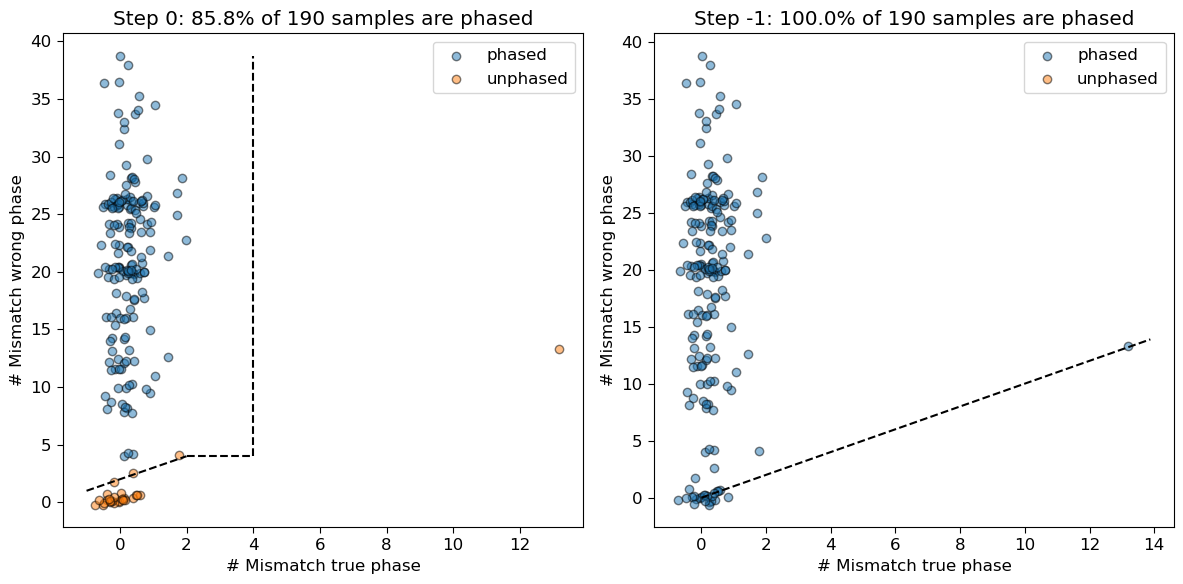

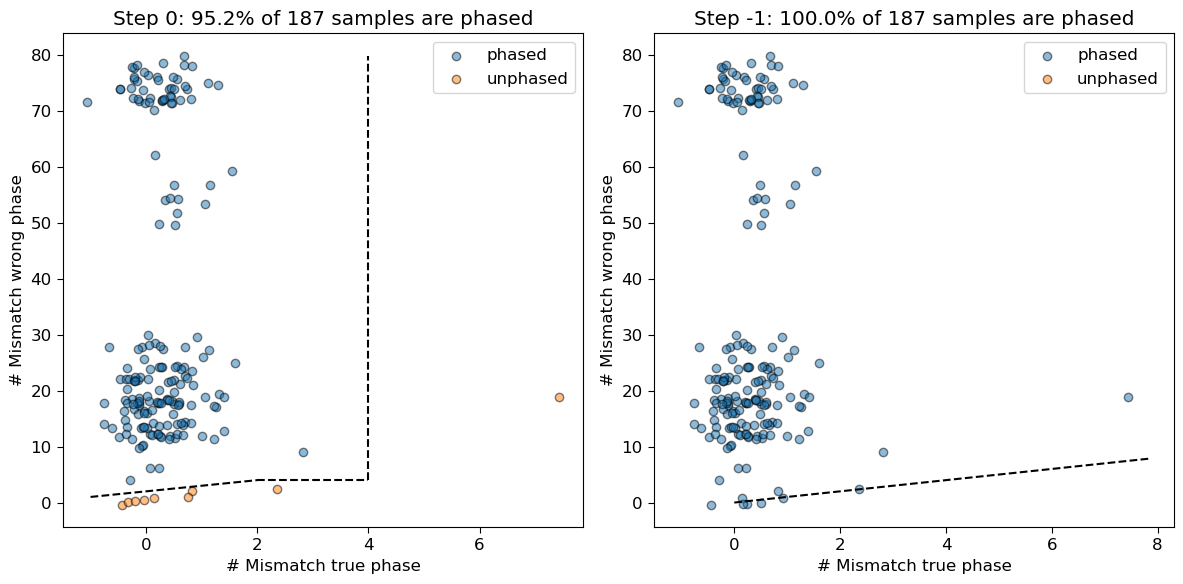

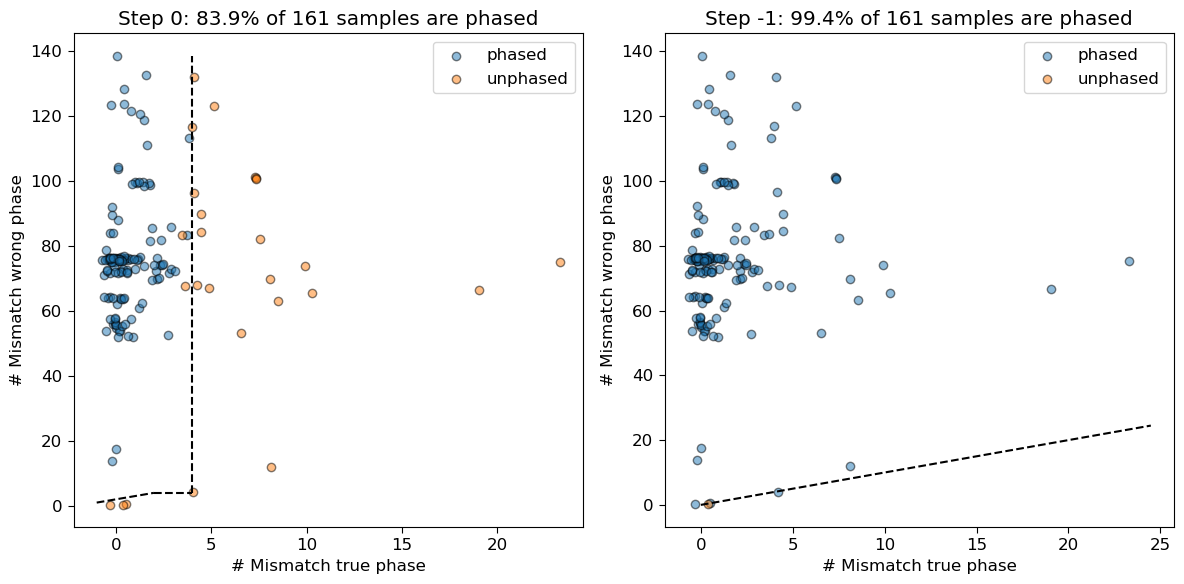

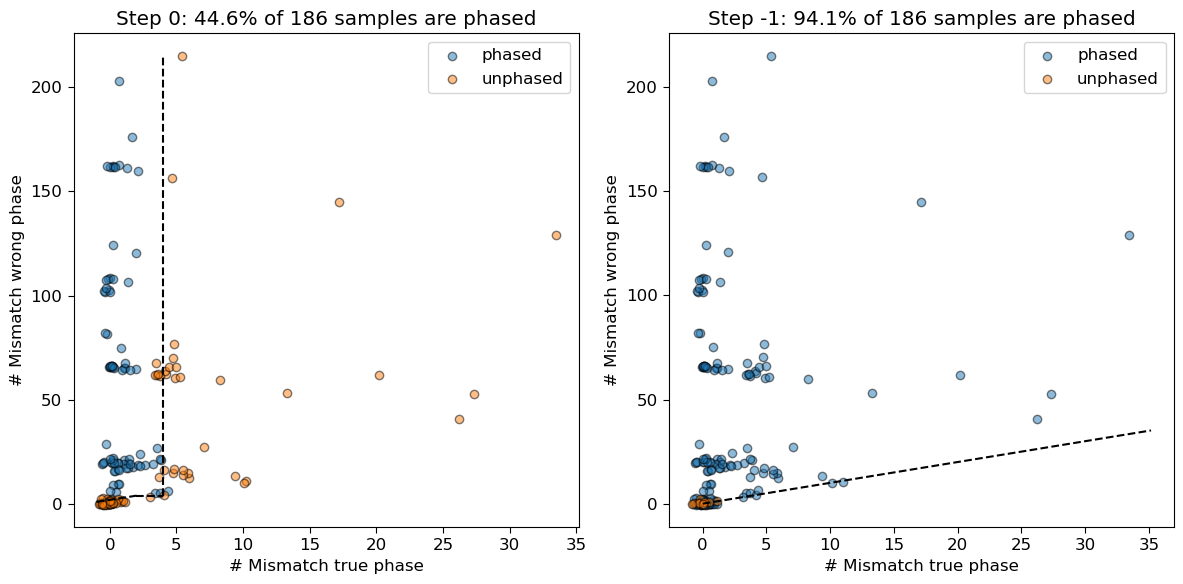

In [37]:
# For GAMCC
ipd_gen_file_dir = '/well/band/users/rbx225/recyclable_files/hla_reference_files/alignments_v3570/'
hla_gene_information = pd.read_csv('/well/band/users/rbx225/software/QUILT_sus/hla_ancillary_files/hla_gene_information.tsv', sep = ' ')
samples_to_remove = []

gamcc_hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv', unique_two_field = True)
gamcc_hla = gamcc_hla[['SampleID', 'Locus', 'Two field1', 'Two field2']].reset_index(drop = True)

colnames = ['Sample ID'] + [label for g in HLA_GENES for label in [f'HLA-{g} 1', f'HLA-{g} 2']]
hlatypes = pd.DataFrame(columns = colnames)
for s in gamcc_hla['SampleID'].unique():
    tmp = gamcc_hla[gamcc_hla['SampleID'] == s]
    row = [s] + tmp[['Two field1', 'Two field2']].values.ravel().tolist()
    hlatypes.loc[len(hlatypes)] = row

reference_allele_file = '/well/band/users/rbx225/recyclable_files/hla/b38_reference_alleles.tsv'
reference_allele_ary = np.array(lcwgsus.read_tsv_as_lst(reference_allele_file))
# phased_vcf = "/well/band/users/rbx225/GAMCC/results/two-stage-imputation/vanilla/malariaGen_v1_b38_topmed/vcf/chr6.dose.vcf.gz"
phased_vcf = '/well/band/users/rbx225/GAMCC/results/imputation/vcfs/malariaGen_v1_b38/quilt.chr6.vcf.gz'

subset_vcf_samples = lcwgsus.read_tsv_as_lst('/well/band/users/rbx225/GAMCC/data/sample_tsvs/fv_gm_names.tsv')
subset_vcf_samples = ','.join(subset_vcf_samples)

sample_linker = pd.read_csv(SAMPLE_LINKER_FILE)
sample_linker = {k:v for k, v in zip(sample_linker['Sample_Name'], sample_linker['Chip_Name'])}

return_dict_ary = []
metrics = pd.DataFrame(columns = ['Gene', 'Length', 'n_SNP', 'n_heterozygous', 'n_phased'])
for gene in HLA_GENES:
    return_dict = phase_hla_on_haplotypes(gene = gene, 
                                ipd_gen_file_dir = ipd_gen_file_dir, 
                                hla_gene_information = hla_gene_information, 
                                hlatypes = hlatypes,
                                phased_vcf = phased_vcf, 
                                reference_allele_ary = reference_allele_ary, 
                                read_from_QUILT = True, 
                                subset_vcf_samples = subset_vcf_samples,
                                sample_linker = sample_linker)
        
    return_dict_ary.append(return_dict)

    ix = hla_gene_information[hla_gene_information['Name'] == f'HLA-{gene}'].index[0]
    length = (hla_gene_information['End'] - hla_gene_information['Start']).loc[ix]
    n_snp = len(return_dict['merged_snps'])
    n_heterozygous = len(hlatypes[(hlatypes[f'HLA-{gene} 1'] != hlatypes[f'HLA-{gene} 2'])])
    n_phased = n_heterozygous-len(return_dict['unphased_df'])

    metrics.loc[len(metrics)] = [gene, length, n_snp, n_heterozygous, n_phased]
    
for gene, r in zip(HLA_GENES, return_dict_ary):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    plot_phase(r, 0, ax=axes[0], title = gene)
    plot_phase(r, -1, ax=axes[1], title = gene)

    plt.tight_layout()
    plt.show()

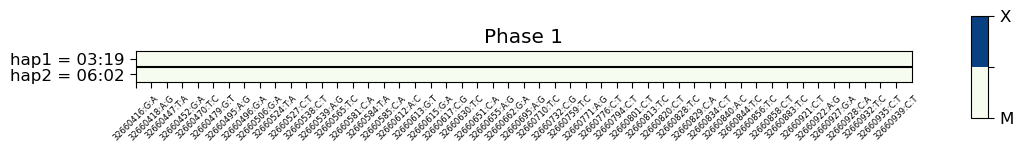

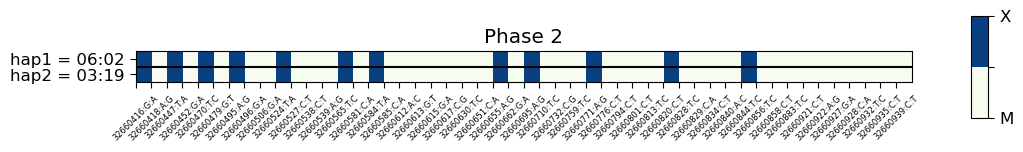

In [48]:
return_dict = return_dict_ary[3]

s = 'GAM205638'
ix = np.where(hlatypes['Sample ID'] == s)[0][0]
step = 0
merged_snps = return_dict['merged_snps']
vcfallele1 = return_dict['vcfalleles1_ary'][step]
vcfallele2 = return_dict['vcfalleles2_ary'][step]
trueallele1 = return_dict['truealleles1_ary'][step]
trueallele2 = return_dict['truealleles2_ary'][step]
type1 = lcwgsus.retain_smallest_two_field(lcwgsus.merge_two_field(return_dict['reftypes1'][ix]))
type2 = lcwgsus.retain_smallest_two_field(lcwgsus.merge_two_field(return_dict['reftypes2'][ix]))
    
plot_phasing_bar_graph(s, ix, merged_snps, 
                       vcfallele1, vcfallele2, trueallele1, trueallele2, 
                       type1, type2, 20, 70)

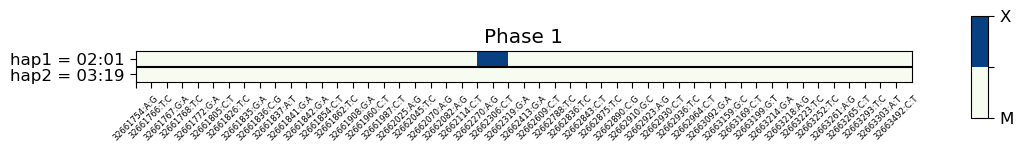

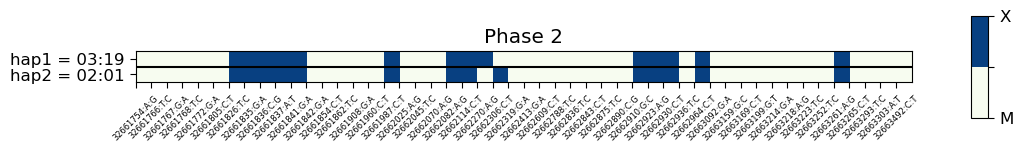

In [91]:
return_dict = return_dict_ary[3]

s = 'GAM473981'
ix = np.where(hlatypes['Sample ID'] == s)[0][0]
step = 0

merged_snps = return_dict['merged_snps']
vcfallele1 = return_dict['vcfalleles1_ary'][step]
vcfallele2 = return_dict['vcfalleles2_ary'][step]
trueallele1 = return_dict['truealleles1_ary'][step]
trueallele2 = return_dict['truealleles2_ary'][step]
type1 = lcwgsus.retain_smallest_two_field(lcwgsus.merge_two_field(return_dict['reftypes1'][ix]))
type2 = lcwgsus.retain_smallest_two_field(lcwgsus.merge_two_field(return_dict['reftypes2'][ix]))
    
plot_phasing_bar_graph(s, ix, merged_snps, 
                       vcfallele1, vcfallele2, trueallele1, trueallele2, 
                       type1, type2, 100, 150)

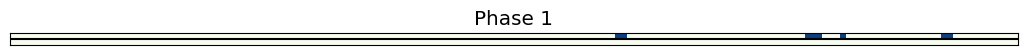

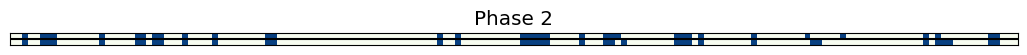

In [114]:
return_dict = return_dict_ary[3]

s = 'GAM473981'
ix = np.where(hlatypes['Sample ID'] == s)[0][0]
step = 0

merged_snps = return_dict['merged_snps']
vcfallele1 = return_dict['vcfalleles1_ary'][step]
vcfallele2 = return_dict['vcfalleles2_ary'][step]
trueallele1 = return_dict['truealleles1_ary'][step]
trueallele2 = return_dict['truealleles2_ary'][step]
type1 = lcwgsus.retain_smallest_two_field(lcwgsus.merge_two_field(return_dict['reftypes1'][ix]))
type2 = lcwgsus.retain_smallest_two_field(lcwgsus.merge_two_field(return_dict['reftypes2'][ix]))
    
plot_phasing_bar_graph(s, ix, merged_snps, 
                       vcfallele1, vcfallele2, trueallele1, trueallele2, 
                       type1, type2, 20, 190, False, (13,12))

In [38]:
metrics

,Gene,Length,n_SNP,n_heterozygous,n_phased
0,A,2901,116,187,187
1,B,2675,85,190,190
2,C,2902,124,187,187
3,DQB1,6371,216,161,160
4,DRB1,10651,229,186,175


## Aggregate phasing

### With Region and Population

In [ ]:
output = 'results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls.tsv'

for num, gene in enumerate(HLA_GENES):
    direct_phasing = pd.read_csv(f'results/phasing/phased_dfs/oneKG_30x-strict-{gene}.tsv', sep = '\t')

    unphased_df = direct_phasing[pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2'])]
    phased_df = direct_phasing[~(pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2']))]
    unphased_samples = unphased_df['Sample ID'].tolist()

    beagle_hla = pd.concat([pd.read_csv(f"results/phasing/HLA_1KG_BEAGLE/tmp/beagle_phased_per_sample/{gene}.{s}.1KG.tsv", sep = '\t') for s in unphased_samples])
    beagle_hla = beagle_hla.reset_index(drop = True)

    final_phasing = pd.concat([phased_df, beagle_hla]).sort_values(by = ['Sample ID'])

    unphased_to_check = beagle_hla[beagle_hla.isna().sum(axis=1) == 1]['Sample ID'].tolist()

    hlatypes = pd.read_csv('results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
    hlatypes = hlatypes[hlatypes['Sample ID'].isin(unphased_to_check)][['Sample ID', f'HLA-{gene} 1', f'HLA-{gene} 2']].sort_values(by = 'Sample ID').reset_index(drop = True).fillna('-9')

    for i,s in enumerate(unphased_to_check):
        original_idx = np.where(final_phasing['Sample ID'] == s)[0][0]
        if ('/' in hlatypes.iloc[i, 1]) or ('/' in hlatypes.iloc[i, 2]):
            type1 = hlatypes.iloc[i, 1]
            type2 = hlatypes.iloc[i, 2]
            
            if final_phasing.iloc[original_idx, 1] == type1:
                final_phasing.iloc[original_idx, 2] = type2
            elif final_phasing.iloc[original_idx, 1] == type2:
                final_phasing.iloc[original_idx, 2] = type1
            elif final_phasing.iloc[original_idx, 2] == type1:
                final_phasing.iloc[original_idx, 1] = type2
            elif final_phasing.iloc[original_idx, 2] == type2:
                final_phasing.iloc[original_idx, 1] = type1
            else:
                pass
        else:
            final_phasing.iloc[original_idx, 1] = 'N/A'
            final_phasing.iloc[original_idx, 2] = 'N/A'
    
    if num == 0:
        df = final_phasing
    else:
        df = pd.merge(df, final_phasing, on = 'Sample ID')
df = df.fillna('N/A')
oneKG = df.copy()

hlatypes = pd.read_csv('results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
hlatypes = hlatypes[['Region', 'Population', 'Sample ID']]
oneKG = pd.merge(hlatypes, oneKG, on = 'Sample ID')

sl = pd.read_csv(SAMPLE_LINKER_FILE)
sl = sl[~sl['Sample_Name'].str.contains('mini')]

sl_gam_gm = {k:v for k,v in zip(sl['Chip_Name'], sl['Sample_Name'])}
sl_gm_idt = {k:v for k,v in zip(sl['Sample_Name'], sl['Seq_Name'])}
sl_gam_idt = {k:v for k,v in zip(sl['Chip_Name'], sl['Seq_Name'])}
sl_idt_gm = {k:v for k,v in zip(sl['Seq_Name'], sl['Sample_Name'])}

for num, gene in enumerate(HLA_GENES):
    direct_phasing = pd.read_csv(f'results/phasing/phased_dfs/GAMCC-{gene}.tsv', sep = '\t')
    direct_phasing['Sample ID'] = direct_phasing['Sample ID'].apply(lambda x: sl_gam_idt[x])
    unphased_df = direct_phasing[pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2'])]
    phased_df = direct_phasing[~(pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2']))]
    unphased_samples = unphased_df['Sample ID'].tolist()
    unphased_samples = [sl_idt_gm[s] for s in unphased_samples]

    beagle_hla = pd.concat([pd.read_csv(f"results/phasing/HLA_GAMCC_BEAGLE/tmp/beagle_phased_per_sample/{gene}.{s}.GAMCC.tsv", sep = '\t') for s in unphased_samples])
    beagle_hla = beagle_hla.reset_index(drop = True)
    beagle_hla['Sample ID'] = beagle_hla['Sample ID'].apply(lambda x: sl_gm_idt[x])

    final_phasing = pd.concat([phased_df, beagle_hla]).sort_values(by = ['Sample ID'])

    unphased_to_check = beagle_hla[beagle_hla.isna().sum(axis=1) == 1]['Sample ID'].tolist()

    hlatypes = pd.read_csv('data/hla_direct_sequencing/GAMCC_hlatypes.tsv', sep = '\t')
    hlatypes['Sample ID'] = hlatypes['Sample ID'].apply(lambda x: sl_gam_idt[x])
    hlatypes = hlatypes[hlatypes['Sample ID'].isin(unphased_to_check)][['Sample ID', f'HLA-{gene} 1', f'HLA-{gene} 2']].sort_values(by = 'Sample ID').reset_index(drop = True).fillna('-9')

    for i,s in enumerate(unphased_to_check):
        original_idx = np.where(final_phasing['Sample ID'] == s)[0][0]
        if ('/' in hlatypes.iloc[i, 1]) or ('/' in hlatypes.iloc[i, 2]):
            type1 = hlatypes.iloc[i, 1]
            type2 = hlatypes.iloc[i, 2]
            
            if final_phasing.iloc[original_idx, 1] == type1:
                final_phasing.iloc[original_idx, 2] = type2
            elif final_phasing.iloc[original_idx, 1] == type2:
                final_phasing.iloc[original_idx, 2] = type1
            elif final_phasing.iloc[original_idx, 2] == type1:
                final_phasing.iloc[original_idx, 1] = type2
            elif final_phasing.iloc[original_idx, 2] == type2:
                final_phasing.iloc[original_idx, 1] = type1
            else:
                pass
        else:
            final_phasing.iloc[original_idx, 1] = 'N/A'
            final_phasing.iloc[original_idx, 2] = 'N/A'
    
    if num == 0:
        df = final_phasing
    else:
        df = pd.merge(df, final_phasing, on = 'Sample ID')
df = df.fillna('N/A')
gamcc = df.copy()

hlatypes = df[['Sample ID']]
hlatypes['Region'] = 'AFR'
hlatypes['Population'] = 'GWD'
hlatypes = hlatypes[['Region', 'Population', 'Sample ID']]
gamcc = pd.merge(hlatypes, gamcc, on = 'Sample ID')
gamcc.iloc[:, 3:] = gamcc.iloc[:, 3:].applymap(lcwgsus.merge_two_field)

## Replace N/A with '' and recode ambiguous alleles as 1KG format
merged = pd.concat([oneKG, gamcc])
merged.iloc[:, 3:] = merged.iloc[:, 3:].applymap(lcwgsus.retain_smallest_two_field)
merged = merged.replace('-9', 'N/A')
merged = merged.fillna('N/A')
merged.to_csv(output, sep = '\t', index = False, header = True)

### Without Region and Population (for my optimal run)

In [ ]:
output = 'results/hla_ref_panel/oneKG_mGenv1/oneKG_mGenv1_HLA_calls_new.tsv'

for num, gene in enumerate(HLA_GENES):
    direct_phasing = pd.read_csv(f'results/phasing/phased_dfs/oneKG_30x-strict-{gene}.tsv', sep = '\t')

    unphased_df = direct_phasing[pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2'])]
    phased_df = direct_phasing[~(pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2']))]
    unphased_samples = unphased_df['Sample ID'].tolist()

    beagle_hla = pd.concat([pd.read_csv(f"results/phasing/HLA_1KG_BEAGLE/tmp/beagle_phased_per_sample/{gene}.{s}.1KG.tsv", sep = '\t') for s in unphased_samples])
    beagle_hla = beagle_hla.reset_index(drop = True)

    final_phasing = pd.concat([phased_df, beagle_hla]).sort_values(by = ['Sample ID'])

    unphased_to_check = beagle_hla[beagle_hla.isna().sum(axis=1) == 1]['Sample ID'].tolist()

    hlatypes = pd.read_csv('results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
    hlatypes = hlatypes[hlatypes['Sample ID'].isin(unphased_to_check)][['Sample ID', f'HLA-{gene} 1', f'HLA-{gene} 2']].sort_values(by = 'Sample ID').reset_index(drop = True).fillna('-9')

    for i,s in enumerate(unphased_to_check):
        original_idx = np.where(final_phasing['Sample ID'] == s)[0][0]
        if ('/' in hlatypes.iloc[i, 1]) or ('/' in hlatypes.iloc[i, 2]):
            type1 = hlatypes.iloc[i, 1]
            type2 = hlatypes.iloc[i, 2]
            
            if final_phasing.iloc[original_idx, 1] == type1:
                final_phasing.iloc[original_idx, 2] = type2
            elif final_phasing.iloc[original_idx, 1] == type2:
                final_phasing.iloc[original_idx, 2] = type1
            elif final_phasing.iloc[original_idx, 2] == type1:
                final_phasing.iloc[original_idx, 1] = type2
            elif final_phasing.iloc[original_idx, 2] == type2:
                final_phasing.iloc[original_idx, 1] = type1
            else:
                pass
        else:
            final_phasing.iloc[original_idx, 1] = 'N/A'
            final_phasing.iloc[original_idx, 2] = 'N/A'
    
    if num == 0:
        df = final_phasing
    else:
        df = pd.merge(df, final_phasing, on = 'Sample ID')
df = df.fillna('N/A')
oneKG = df.copy()

sl = pd.read_csv(SAMPLE_LINKER_FILE)
sl = sl[~sl['Sample_Name'].str.contains('mini')]

sl_gam_gm = {k:v for k,v in zip(sl['Chip_Name'], sl['Sample_Name'])}
sl_gm_idt = {k:v for k,v in zip(sl['Sample_Name'], sl['Seq_Name'])}
sl_gam_idt = {k:v for k,v in zip(sl['Chip_Name'], sl['Seq_Name'])}
sl_idt_gm = {k:v for k,v in zip(sl['Seq_Name'], sl['Sample_Name'])}

for num, gene in enumerate(HLA_GENES):
    direct_phasing = pd.read_csv(f'results/phasing/phased_dfs/GAMCC-{gene}.tsv', sep = '\t')
    direct_phasing['Sample ID'] = direct_phasing['Sample ID'].apply(lambda x: sl_gam_idt[x])
    unphased_df = direct_phasing[pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2'])]
    phased_df = direct_phasing[~(pd.isna(direct_phasing[f'HLA-{gene} 1']) & pd.isna(direct_phasing[f'HLA-{gene} 2']))]
    unphased_samples = unphased_df['Sample ID'].tolist()
    unphased_samples = [sl_idt_gm[s] for s in unphased_samples]

    beagle_hla = pd.concat([pd.read_csv(f"results/phasing/HLA_GAMCC_BEAGLE/tmp/beagle_phased_per_sample/{gene}.{s}.GAMCC.tsv", sep = '\t') for s in unphased_samples])
    beagle_hla = beagle_hla.reset_index(drop = True)
    beagle_hla['Sample ID'] = beagle_hla['Sample ID'].apply(lambda x: sl_gm_idt[x])

    final_phasing = pd.concat([phased_df, beagle_hla]).sort_values(by = ['Sample ID'])

    unphased_to_check = beagle_hla[beagle_hla.isna().sum(axis=1) == 1]['Sample ID'].tolist()

    hlatypes = pd.read_csv('data/hla_direct_sequencing/GAMCC_hlatypes.tsv', sep = '\t')
    hlatypes['Sample ID'] = hlatypes['Sample ID'].apply(lambda x: sl_gam_idt[x])
    hlatypes = hlatypes[hlatypes['Sample ID'].isin(unphased_to_check)][['Sample ID', f'HLA-{gene} 1', f'HLA-{gene} 2']].sort_values(by = 'Sample ID').reset_index(drop = True).fillna('-9')

    for i,s in enumerate(unphased_to_check):
        original_idx = np.where(final_phasing['Sample ID'] == s)[0][0]
        if ('/' in hlatypes.iloc[i, 1]) or ('/' in hlatypes.iloc[i, 2]):
            type1 = hlatypes.iloc[i, 1]
            type2 = hlatypes.iloc[i, 2]
            
            if final_phasing.iloc[original_idx, 1] == type1:
                final_phasing.iloc[original_idx, 2] = type2
            elif final_phasing.iloc[original_idx, 1] == type2:
                final_phasing.iloc[original_idx, 2] = type1
            elif final_phasing.iloc[original_idx, 2] == type1:
                final_phasing.iloc[original_idx, 1] = type2
            elif final_phasing.iloc[original_idx, 2] == type2:
                final_phasing.iloc[original_idx, 1] = type1
            else:
                pass
        else:
            final_phasing.iloc[original_idx, 1] = 'N/A'
            final_phasing.iloc[original_idx, 2] = 'N/A'
    
    if num == 0:
        df = final_phasing
    else:
        df = pd.merge(df, final_phasing, on = 'Sample ID')
df = df.fillna('N/A')
gamcc = df.copy()
gamcc.iloc[:, 1:] = gamcc.iloc[:, 1:].applymap(lcwgsus.merge_two_field)

merged = pd.concat([oneKG, gamcc])
merged.iloc[:, 1:] = merged.iloc[:, 1:].applymap(lcwgsus.retain_smallest_two_field)
merged = merged.fillna('N/A')
merged = merged.replace('-9', 'N/A')
merged.to_csv(output, sep = '\t', index = False, header = True)
merged

## Examine BEAGLE phasing missing HLA types

In [ ]:
study = '1KG'
gene = 'A'
vcf = lcwgsus.read_vcf(f'results/phasing/HLA_{study}_BEAGLE/tmp/phased.{gene}.{study}.chr6.vcf.gz')
samples = vcf.columns[9:].tolist()
vcf = vcf.drop(columns = ['chr', 'pos', 'ref', 'alt', 'QUAL', 'FILTER', 'INFO', 'FORMAT']).reset_index(drop = True).T

beagle_hla = pd.DataFrame({'Sample ID': samples})
beagle_hla[f'HLA-{gene} 1'] = 'N/A'
beagle_hla[f'HLA-{gene} 2'] = 'N/A'

In [ ]:
study = '1KG'
gene = 'A'
vcf = lcwgsus.read_vcf(f'results/phasing/HLA_{study}_BEAGLE/tmp/phased.{gene}.{study}.chr6.vcf.gz')
samples = vcf.columns[9:].tolist()
vcf = vcf.drop(columns = ['chr', 'pos', 'ref', 'alt', 'QUAL', 'FILTER', 'INFO', 'FORMAT']).reset_index(drop = True).T

beagle_hla = pd.DataFrame({'Sample ID': samples})
beagle_hla[f'HLA-{gene} 1'] = 'N/A'
beagle_hla[f'HLA-{gene} 2'] = 'N/A'

for i,s in enumerate(samples):
    vcf_row = vcf.loc[s, :]
    alleles_idx = vcf_row.index[vcf_row.str.contains('1')]
    if len(alleles_idx) != 0:
        if (len(alleles_idx) == 2) and (vcf.loc[s,alleles_idx[0]] == vcf.loc[s,alleles_idx[1]]): # Means beagle phase the two HLA alleles to one haplotype
            pass
        else:
            for j in alleles_idx:
                name = vcf.loc['ID',j]
                genotype = vcf.loc[s,j]
                twofield = name.split('*')[1]
                if genotype == '1|0':
                    beagle_hla.loc[i, f'HLA-{gene} 1'] = twofield
                elif genotype == '0|1':
                    beagle_hla.loc[i, f'HLA-{gene} 2'] = twofield
                elif genotype == '1|1':
                    beagle_hla.loc[i, f'HLA-{gene} 1'] = twofield
                    beagle_hla.loc[i, f'HLA-{gene} 2'] = twofield
                else:
                    pass
beagle_hla